In [14]:
import argparse

import numpy as np
import tensorflow as tf
import keras.backend as K

import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2

import glob
import os
import cv2
import keras


import time
import argparse

from tqdm import tqdm
from keras.datasets import mnist, cifar10
from keras.models import load_model, Model


In [2]:
cd "C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/Original/final/train"

C:\Users\Francisco Duran\Desktop\upc\project_notebooks\CNN-in-mobile-device\data\raw\Original\final\train


In [3]:
def get_im(path):
    # Load as grayscale
    img = cv2.imread(path, 0)
    # Reduce size
    resized = cv2.resize(img, (img_width, img_height))
    return resized

def load_train():
    X_train = []
    y_train = []
    print('Read train images')
    for j in range(43):
        print('Load folder c{}'.format(j))
        if(j<10):
            path = os.path.join('..', 'train', '0000' + str(j), '*.jpg')
        else:
            path = os.path.join('..', 'train', '000' + str(j), '*.jpg')
        files = glob.glob(path)
        print(files)
        for fl in files:
            print(fl)
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j)

    return X_train, y_train

def load_test():
    X_test = []
    y_test = []
    print('Read test images')
    for j in range(43):
        print('Load folder c{}'.format(j))
        if(j<10):
            path = os.path.join('..', 'test','0000' + str(j), '*.jpg')
        else:
            path = os.path.join('..', 'test', '000' + str(j), '*.jpg')
        print(path)
        files = glob.glob(path)
        print(files)
        for fl in files:
            print(fl)
            img = get_im(fl)
            X_test.append(img)
            y_test.append(j)

    return X_test, y_test

def load_val():
    X_val = []
    y_val = []
    print('Read test images')
    for j in range(43):
        print('Load folder c{}'.format(j))
        if(j<10):
            path = os.path.join('..', 'val','0000' + str(j), '*.jpg')
        else:
            path = os.path.join('..', 'val', '000' + str(j), '*.jpg')
        print(path)
        files = glob.glob(path)
        print(files)
        for fl in files:
            print(fl)
            img = get_im(fl)
            X_val.append(img)
            y_val.append(j)

    return X_val, y_val

In [4]:
img_width = 48
img_height = 48
x_train, y_train = load_train()


Read train images
Load folder c0
['..\\train\\00000\\prefix_00000_00000.jpg', '..\\train\\00000\\prefix_00000_00002.jpg', '..\\train\\00000\\prefix_00000_00003.jpg', '..\\train\\00000\\prefix_00000_00004.jpg', '..\\train\\00000\\prefix_00000_00005.jpg', '..\\train\\00000\\prefix_00000_00009.jpg', '..\\train\\00000\\prefix_00000_00010.jpg', '..\\train\\00000\\prefix_00000_00011.jpg', '..\\train\\00000\\prefix_00000_00012.jpg', '..\\train\\00000\\prefix_00000_00013.jpg', '..\\train\\00000\\prefix_00000_00014.jpg', '..\\train\\00000\\prefix_00000_00015.jpg', '..\\train\\00000\\prefix_00000_00016.jpg', '..\\train\\00000\\prefix_00000_00017.jpg', '..\\train\\00000\\prefix_00000_00018.jpg', '..\\train\\00000\\prefix_00000_00019.jpg', '..\\train\\00000\\prefix_00000_00020.jpg', '..\\train\\00000\\prefix_00000_00021.jpg', '..\\train\\00000\\prefix_00000_00024.jpg', '..\\train\\00000\\prefix_00000_00025.jpg', '..\\train\\00000\\prefix_00000_00027.jpg', '..\\train\\00000\\prefix_00000_00029.jpg'

..\train\00001\prefix_00008_00024.jpg
..\train\00001\prefix_00008_00025.jpg
..\train\00001\prefix_00008_00026.jpg
..\train\00001\prefix_00008_00029.jpg
..\train\00001\prefix_00009_00002.jpg
..\train\00001\prefix_00009_00003.jpg
..\train\00001\prefix_00009_00004.jpg
..\train\00001\prefix_00009_00007.jpg
..\train\00001\prefix_00009_00008.jpg
..\train\00001\prefix_00009_00009.jpg
..\train\00001\prefix_00009_00010.jpg
..\train\00001\prefix_00009_00011.jpg
..\train\00001\prefix_00009_00012.jpg
..\train\00001\prefix_00009_00015.jpg
..\train\00001\prefix_00009_00016.jpg
..\train\00001\prefix_00009_00018.jpg
..\train\00001\prefix_00009_00019.jpg
..\train\00001\prefix_00009_00021.jpg
..\train\00001\prefix_00009_00023.jpg
..\train\00001\prefix_00009_00024.jpg
..\train\00001\prefix_00009_00025.jpg
..\train\00001\prefix_00009_00026.jpg
..\train\00001\prefix_00009_00027.jpg
..\train\00001\prefix_00009_00028.jpg
..\train\00001\prefix_00009_00029.jpg
..\train\00001\prefix_00010_00000.jpg
..\train\000

..\train\00001\prefix_00026_00027.jpg
..\train\00001\prefix_00026_00028.jpg
..\train\00001\prefix_00026_00029.jpg
..\train\00001\prefix_00027_00001.jpg
..\train\00001\prefix_00027_00002.jpg
..\train\00001\prefix_00027_00003.jpg
..\train\00001\prefix_00027_00005.jpg
..\train\00001\prefix_00027_00006.jpg
..\train\00001\prefix_00027_00007.jpg
..\train\00001\prefix_00027_00008.jpg
..\train\00001\prefix_00027_00009.jpg
..\train\00001\prefix_00027_00010.jpg
..\train\00001\prefix_00027_00012.jpg
..\train\00001\prefix_00027_00015.jpg
..\train\00001\prefix_00027_00017.jpg
..\train\00001\prefix_00027_00018.jpg
..\train\00001\prefix_00027_00019.jpg
..\train\00001\prefix_00027_00020.jpg
..\train\00001\prefix_00027_00021.jpg
..\train\00001\prefix_00027_00024.jpg
..\train\00001\prefix_00027_00025.jpg
..\train\00001\prefix_00027_00026.jpg
..\train\00001\prefix_00027_00027.jpg
..\train\00001\prefix_00027_00028.jpg
..\train\00001\prefix_00027_00029.jpg
..\train\00001\prefix_00028_00000.jpg
..\train\000

..\train\00001\prefix_00046_00000.jpg
..\train\00001\prefix_00046_00001.jpg
..\train\00001\prefix_00046_00003.jpg
..\train\00001\prefix_00046_00005.jpg
..\train\00001\prefix_00046_00006.jpg
..\train\00001\prefix_00046_00007.jpg
..\train\00001\prefix_00046_00008.jpg
..\train\00001\prefix_00046_00009.jpg
..\train\00001\prefix_00046_00010.jpg
..\train\00001\prefix_00046_00011.jpg
..\train\00001\prefix_00046_00012.jpg
..\train\00001\prefix_00046_00014.jpg
..\train\00001\prefix_00046_00015.jpg
..\train\00001\prefix_00046_00017.jpg
..\train\00001\prefix_00046_00018.jpg
..\train\00001\prefix_00046_00019.jpg
..\train\00001\prefix_00046_00020.jpg
..\train\00001\prefix_00046_00021.jpg
..\train\00001\prefix_00046_00022.jpg
..\train\00001\prefix_00046_00023.jpg
..\train\00001\prefix_00046_00024.jpg
..\train\00001\prefix_00046_00025.jpg
..\train\00001\prefix_00046_00026.jpg
..\train\00001\prefix_00046_00029.jpg
..\train\00001\prefix_00047_00000.jpg
..\train\00001\prefix_00047_00001.jpg
..\train\000

..\train\00001\prefix_00065_00018.jpg
..\train\00001\prefix_00065_00019.jpg
..\train\00001\prefix_00065_00020.jpg
..\train\00001\prefix_00065_00021.jpg
..\train\00001\prefix_00065_00022.jpg
..\train\00001\prefix_00065_00023.jpg
..\train\00001\prefix_00065_00024.jpg
..\train\00001\prefix_00065_00025.jpg
..\train\00001\prefix_00065_00026.jpg
..\train\00001\prefix_00065_00028.jpg
..\train\00001\prefix_00066_00000.jpg
..\train\00001\prefix_00066_00001.jpg
..\train\00001\prefix_00066_00003.jpg
..\train\00001\prefix_00066_00005.jpg
..\train\00001\prefix_00066_00006.jpg
..\train\00001\prefix_00066_00007.jpg
..\train\00001\prefix_00066_00009.jpg
..\train\00001\prefix_00066_00011.jpg
..\train\00001\prefix_00066_00012.jpg
..\train\00001\prefix_00066_00013.jpg
..\train\00001\prefix_00066_00014.jpg
..\train\00001\prefix_00066_00015.jpg
..\train\00001\prefix_00066_00017.jpg
..\train\00001\prefix_00066_00018.jpg
..\train\00001\prefix_00066_00020.jpg
..\train\00001\prefix_00066_00022.jpg
..\train\000

..\train\00002\prefix_00008_00025.jpg
..\train\00002\prefix_00008_00026.jpg
..\train\00002\prefix_00008_00029.jpg
..\train\00002\prefix_00009_00000.jpg
..\train\00002\prefix_00009_00002.jpg
..\train\00002\prefix_00009_00003.jpg
..\train\00002\prefix_00009_00004.jpg
..\train\00002\prefix_00009_00007.jpg
..\train\00002\prefix_00009_00008.jpg
..\train\00002\prefix_00009_00009.jpg
..\train\00002\prefix_00009_00010.jpg
..\train\00002\prefix_00009_00011.jpg
..\train\00002\prefix_00009_00012.jpg
..\train\00002\prefix_00009_00015.jpg
..\train\00002\prefix_00009_00016.jpg
..\train\00002\prefix_00009_00017.jpg
..\train\00002\prefix_00009_00018.jpg
..\train\00002\prefix_00009_00019.jpg
..\train\00002\prefix_00009_00021.jpg
..\train\00002\prefix_00009_00023.jpg
..\train\00002\prefix_00009_00024.jpg
..\train\00002\prefix_00009_00025.jpg
..\train\00002\prefix_00009_00026.jpg
..\train\00002\prefix_00009_00027.jpg
..\train\00002\prefix_00009_00028.jpg
..\train\00002\prefix_00009_00029.jpg
..\train\000

..\train\00002\prefix_00026_00003.jpg
..\train\00002\prefix_00026_00005.jpg
..\train\00002\prefix_00026_00006.jpg
..\train\00002\prefix_00026_00008.jpg
..\train\00002\prefix_00026_00009.jpg
..\train\00002\prefix_00026_00010.jpg
..\train\00002\prefix_00026_00011.jpg
..\train\00002\prefix_00026_00012.jpg
..\train\00002\prefix_00026_00013.jpg
..\train\00002\prefix_00026_00014.jpg
..\train\00002\prefix_00026_00015.jpg
..\train\00002\prefix_00026_00016.jpg
..\train\00002\prefix_00026_00017.jpg
..\train\00002\prefix_00026_00018.jpg
..\train\00002\prefix_00026_00020.jpg
..\train\00002\prefix_00026_00021.jpg
..\train\00002\prefix_00026_00022.jpg
..\train\00002\prefix_00026_00023.jpg
..\train\00002\prefix_00026_00024.jpg
..\train\00002\prefix_00026_00025.jpg
..\train\00002\prefix_00026_00026.jpg
..\train\00002\prefix_00026_00027.jpg
..\train\00002\prefix_00026_00028.jpg
..\train\00002\prefix_00026_00029.jpg
..\train\00002\prefix_00027_00001.jpg
..\train\00002\prefix_00027_00002.jpg
..\train\000

..\train\00002\prefix_00045_00023.jpg
..\train\00002\prefix_00045_00024.jpg
..\train\00002\prefix_00045_00026.jpg
..\train\00002\prefix_00045_00027.jpg
..\train\00002\prefix_00045_00029.jpg
..\train\00002\prefix_00046_00000.jpg
..\train\00002\prefix_00046_00001.jpg
..\train\00002\prefix_00046_00003.jpg
..\train\00002\prefix_00046_00005.jpg
..\train\00002\prefix_00046_00006.jpg
..\train\00002\prefix_00046_00007.jpg
..\train\00002\prefix_00046_00008.jpg
..\train\00002\prefix_00046_00010.jpg
..\train\00002\prefix_00046_00011.jpg
..\train\00002\prefix_00046_00012.jpg
..\train\00002\prefix_00046_00014.jpg
..\train\00002\prefix_00046_00015.jpg
..\train\00002\prefix_00046_00017.jpg
..\train\00002\prefix_00046_00018.jpg
..\train\00002\prefix_00046_00019.jpg
..\train\00002\prefix_00046_00020.jpg
..\train\00002\prefix_00046_00021.jpg
..\train\00002\prefix_00046_00022.jpg
..\train\00002\prefix_00046_00023.jpg
..\train\00002\prefix_00046_00024.jpg
..\train\00002\prefix_00046_00025.jpg
..\train\000

..\train\00002\prefix_00064_00009.jpg
..\train\00002\prefix_00064_00010.jpg
..\train\00002\prefix_00064_00011.jpg
..\train\00002\prefix_00064_00012.jpg
..\train\00002\prefix_00064_00013.jpg
..\train\00002\prefix_00064_00014.jpg
..\train\00002\prefix_00064_00015.jpg
..\train\00002\prefix_00064_00018.jpg
..\train\00002\prefix_00064_00019.jpg
..\train\00002\prefix_00064_00021.jpg
..\train\00002\prefix_00064_00022.jpg
..\train\00002\prefix_00064_00023.jpg
..\train\00002\prefix_00064_00024.jpg
..\train\00002\prefix_00064_00025.jpg
..\train\00002\prefix_00064_00027.jpg
..\train\00002\prefix_00064_00029.jpg
..\train\00002\prefix_00065_00000.jpg
..\train\00002\prefix_00065_00001.jpg
..\train\00002\prefix_00065_00002.jpg
..\train\00002\prefix_00065_00003.jpg
..\train\00002\prefix_00065_00004.jpg
..\train\00002\prefix_00065_00005.jpg
..\train\00002\prefix_00065_00007.jpg
..\train\00002\prefix_00065_00008.jpg
..\train\00002\prefix_00065_00009.jpg
..\train\00002\prefix_00065_00011.jpg
..\train\000

..\train\00003\prefix_00008_00003.jpg
..\train\00003\prefix_00008_00004.jpg
..\train\00003\prefix_00008_00005.jpg
..\train\00003\prefix_00008_00006.jpg
..\train\00003\prefix_00008_00008.jpg
..\train\00003\prefix_00008_00009.jpg
..\train\00003\prefix_00008_00010.jpg
..\train\00003\prefix_00008_00011.jpg
..\train\00003\prefix_00008_00012.jpg
..\train\00003\prefix_00008_00013.jpg
..\train\00003\prefix_00008_00014.jpg
..\train\00003\prefix_00008_00016.jpg
..\train\00003\prefix_00008_00018.jpg
..\train\00003\prefix_00008_00019.jpg
..\train\00003\prefix_00008_00020.jpg
..\train\00003\prefix_00008_00021.jpg
..\train\00003\prefix_00008_00023.jpg
..\train\00003\prefix_00008_00024.jpg
..\train\00003\prefix_00008_00025.jpg
..\train\00003\prefix_00008_00026.jpg
..\train\00003\prefix_00008_00027.jpg
..\train\00003\prefix_00008_00028.jpg
..\train\00003\prefix_00008_00029.jpg
..\train\00003\prefix_00009_00001.jpg
..\train\00003\prefix_00009_00002.jpg
..\train\00003\prefix_00009_00003.jpg
..\train\000

..\train\00003\prefix_00025_00021.jpg
..\train\00003\prefix_00025_00022.jpg
..\train\00003\prefix_00025_00023.jpg
..\train\00003\prefix_00025_00024.jpg
..\train\00003\prefix_00025_00029.jpg
..\train\00003\prefix_00026_00000.jpg
..\train\00003\prefix_00026_00002.jpg
..\train\00003\prefix_00026_00003.jpg
..\train\00003\prefix_00026_00004.jpg
..\train\00003\prefix_00026_00005.jpg
..\train\00003\prefix_00026_00006.jpg
..\train\00003\prefix_00026_00007.jpg
..\train\00003\prefix_00026_00009.jpg
..\train\00003\prefix_00026_00010.jpg
..\train\00003\prefix_00026_00011.jpg
..\train\00003\prefix_00026_00012.jpg
..\train\00003\prefix_00026_00013.jpg
..\train\00003\prefix_00026_00014.jpg
..\train\00003\prefix_00026_00015.jpg
..\train\00003\prefix_00026_00016.jpg
..\train\00003\prefix_00026_00017.jpg
..\train\00003\prefix_00026_00018.jpg
..\train\00003\prefix_00026_00020.jpg
..\train\00003\prefix_00026_00021.jpg
..\train\00003\prefix_00026_00022.jpg
..\train\00003\prefix_00026_00023.jpg
..\train\000

..\train\00003\prefix_00041_00012.jpg
..\train\00003\prefix_00041_00013.jpg
..\train\00003\prefix_00041_00014.jpg
..\train\00003\prefix_00041_00015.jpg
..\train\00003\prefix_00041_00016.jpg
..\train\00003\prefix_00041_00018.jpg
..\train\00003\prefix_00041_00019.jpg
..\train\00003\prefix_00041_00021.jpg
..\train\00003\prefix_00041_00022.jpg
..\train\00003\prefix_00041_00023.jpg
..\train\00003\prefix_00041_00024.jpg
..\train\00003\prefix_00041_00025.jpg
..\train\00003\prefix_00041_00026.jpg
..\train\00003\prefix_00041_00027.jpg
..\train\00003\prefix_00041_00028.jpg
..\train\00003\prefix_00042_00000.jpg
..\train\00003\prefix_00042_00001.jpg
..\train\00003\prefix_00042_00002.jpg
..\train\00003\prefix_00042_00003.jpg
..\train\00003\prefix_00042_00004.jpg
..\train\00003\prefix_00042_00005.jpg
..\train\00003\prefix_00042_00007.jpg
..\train\00003\prefix_00042_00008.jpg
..\train\00003\prefix_00042_00009.jpg
..\train\00003\prefix_00042_00010.jpg
..\train\00003\prefix_00042_00011.jpg
..\train\000

..\train\00004\prefix_00010_00003.jpg
..\train\00004\prefix_00010_00004.jpg
..\train\00004\prefix_00010_00005.jpg
..\train\00004\prefix_00010_00006.jpg
..\train\00004\prefix_00010_00007.jpg
..\train\00004\prefix_00010_00008.jpg
..\train\00004\prefix_00010_00009.jpg
..\train\00004\prefix_00010_00010.jpg
..\train\00004\prefix_00010_00011.jpg
..\train\00004\prefix_00010_00012.jpg
..\train\00004\prefix_00010_00014.jpg
..\train\00004\prefix_00010_00015.jpg
..\train\00004\prefix_00010_00016.jpg
..\train\00004\prefix_00010_00019.jpg
..\train\00004\prefix_00010_00020.jpg
..\train\00004\prefix_00010_00021.jpg
..\train\00004\prefix_00010_00024.jpg
..\train\00004\prefix_00010_00025.jpg
..\train\00004\prefix_00010_00028.jpg
..\train\00004\prefix_00010_00029.jpg
..\train\00004\prefix_00011_00001.jpg
..\train\00004\prefix_00011_00002.jpg
..\train\00004\prefix_00011_00005.jpg
..\train\00004\prefix_00011_00006.jpg
..\train\00004\prefix_00011_00009.jpg
..\train\00004\prefix_00011_00011.jpg
..\train\000

..\train\00004\prefix_00026_00028.jpg
..\train\00004\prefix_00026_00029.jpg
..\train\00004\prefix_00027_00001.jpg
..\train\00004\prefix_00027_00002.jpg
..\train\00004\prefix_00027_00003.jpg
..\train\00004\prefix_00027_00004.jpg
..\train\00004\prefix_00027_00005.jpg
..\train\00004\prefix_00027_00006.jpg
..\train\00004\prefix_00027_00008.jpg
..\train\00004\prefix_00027_00009.jpg
..\train\00004\prefix_00027_00010.jpg
..\train\00004\prefix_00027_00012.jpg
..\train\00004\prefix_00027_00013.jpg
..\train\00004\prefix_00027_00015.jpg
..\train\00004\prefix_00027_00016.jpg
..\train\00004\prefix_00027_00017.jpg
..\train\00004\prefix_00027_00018.jpg
..\train\00004\prefix_00027_00019.jpg
..\train\00004\prefix_00027_00020.jpg
..\train\00004\prefix_00027_00021.jpg
..\train\00004\prefix_00027_00024.jpg
..\train\00004\prefix_00027_00025.jpg
..\train\00004\prefix_00027_00026.jpg
..\train\00004\prefix_00027_00027.jpg
..\train\00004\prefix_00027_00028.jpg
..\train\00004\prefix_00027_00029.jpg
..\train\000

..\train\00004\prefix_00044_00019.jpg
..\train\00004\prefix_00044_00020.jpg
..\train\00004\prefix_00044_00021.jpg
..\train\00004\prefix_00044_00023.jpg
..\train\00004\prefix_00044_00024.jpg
..\train\00004\prefix_00044_00025.jpg
..\train\00004\prefix_00044_00026.jpg
..\train\00004\prefix_00044_00027.jpg
..\train\00004\prefix_00044_00028.jpg
..\train\00004\prefix_00045_00000.jpg
..\train\00004\prefix_00045_00002.jpg
..\train\00004\prefix_00045_00003.jpg
..\train\00004\prefix_00045_00006.jpg
..\train\00004\prefix_00045_00007.jpg
..\train\00004\prefix_00045_00008.jpg
..\train\00004\prefix_00045_00009.jpg
..\train\00004\prefix_00045_00010.jpg
..\train\00004\prefix_00045_00011.jpg
..\train\00004\prefix_00045_00012.jpg
..\train\00004\prefix_00045_00013.jpg
..\train\00004\prefix_00045_00014.jpg
..\train\00004\prefix_00045_00015.jpg
..\train\00004\prefix_00045_00016.jpg
..\train\00004\prefix_00045_00017.jpg
..\train\00004\prefix_00045_00018.jpg
..\train\00004\prefix_00045_00019.jpg
..\train\000

..\train\00004\prefix_00060_00019.jpg
..\train\00004\prefix_00060_00020.jpg
..\train\00004\prefix_00060_00022.jpg
..\train\00004\prefix_00060_00023.jpg
..\train\00004\prefix_00060_00024.jpg
..\train\00004\prefix_00060_00025.jpg
..\train\00004\prefix_00060_00026.jpg
..\train\00004\prefix_00060_00028.jpg
..\train\00004\prefix_00060_00029.jpg
..\train\00004\prefix_00061_00000.jpg
..\train\00004\prefix_00061_00001.jpg
..\train\00004\prefix_00061_00003.jpg
..\train\00004\prefix_00061_00004.jpg
..\train\00004\prefix_00061_00005.jpg
..\train\00004\prefix_00061_00006.jpg
..\train\00004\prefix_00061_00007.jpg
..\train\00004\prefix_00061_00008.jpg
..\train\00004\prefix_00061_00009.jpg
..\train\00004\prefix_00061_00010.jpg
..\train\00004\prefix_00061_00011.jpg
..\train\00004\prefix_00061_00012.jpg
..\train\00004\prefix_00061_00013.jpg
..\train\00004\prefix_00061_00015.jpg
..\train\00004\prefix_00061_00016.jpg
..\train\00004\prefix_00061_00017.jpg
..\train\00004\prefix_00061_00019.jpg
..\train\000

..\train\00005\prefix_00011_00025.jpg
..\train\00005\prefix_00011_00026.jpg
..\train\00005\prefix_00011_00027.jpg
..\train\00005\prefix_00011_00028.jpg
..\train\00005\prefix_00011_00029.jpg
..\train\00005\prefix_00012_00000.jpg
..\train\00005\prefix_00012_00001.jpg
..\train\00005\prefix_00012_00002.jpg
..\train\00005\prefix_00012_00003.jpg
..\train\00005\prefix_00012_00004.jpg
..\train\00005\prefix_00012_00006.jpg
..\train\00005\prefix_00012_00007.jpg
..\train\00005\prefix_00012_00008.jpg
..\train\00005\prefix_00012_00009.jpg
..\train\00005\prefix_00012_00010.jpg
..\train\00005\prefix_00012_00011.jpg
..\train\00005\prefix_00012_00012.jpg
..\train\00005\prefix_00012_00013.jpg
..\train\00005\prefix_00012_00014.jpg
..\train\00005\prefix_00012_00016.jpg
..\train\00005\prefix_00012_00017.jpg
..\train\00005\prefix_00012_00018.jpg
..\train\00005\prefix_00012_00019.jpg
..\train\00005\prefix_00012_00020.jpg
..\train\00005\prefix_00012_00021.jpg
..\train\00005\prefix_00012_00022.jpg
..\train\000

..\train\00005\prefix_00028_00012.jpg
..\train\00005\prefix_00028_00013.jpg
..\train\00005\prefix_00028_00014.jpg
..\train\00005\prefix_00028_00015.jpg
..\train\00005\prefix_00028_00016.jpg
..\train\00005\prefix_00028_00017.jpg
..\train\00005\prefix_00028_00018.jpg
..\train\00005\prefix_00028_00020.jpg
..\train\00005\prefix_00028_00021.jpg
..\train\00005\prefix_00028_00022.jpg
..\train\00005\prefix_00028_00023.jpg
..\train\00005\prefix_00028_00028.jpg
..\train\00005\prefix_00028_00029.jpg
..\train\00005\prefix_00029_00000.jpg
..\train\00005\prefix_00029_00001.jpg
..\train\00005\prefix_00029_00002.jpg
..\train\00005\prefix_00029_00003.jpg
..\train\00005\prefix_00029_00004.jpg
..\train\00005\prefix_00029_00005.jpg
..\train\00005\prefix_00029_00006.jpg
..\train\00005\prefix_00029_00008.jpg
..\train\00005\prefix_00029_00009.jpg
..\train\00005\prefix_00029_00010.jpg
..\train\00005\prefix_00029_00011.jpg
..\train\00005\prefix_00029_00013.jpg
..\train\00005\prefix_00029_00014.jpg
..\train\000

..\train\00005\prefix_00046_00001.jpg
..\train\00005\prefix_00046_00002.jpg
..\train\00005\prefix_00046_00003.jpg
..\train\00005\prefix_00046_00004.jpg
..\train\00005\prefix_00046_00006.jpg
..\train\00005\prefix_00046_00007.jpg
..\train\00005\prefix_00046_00008.jpg
..\train\00005\prefix_00046_00009.jpg
..\train\00005\prefix_00046_00010.jpg
..\train\00005\prefix_00046_00011.jpg
..\train\00005\prefix_00046_00012.jpg
..\train\00005\prefix_00046_00014.jpg
..\train\00005\prefix_00046_00015.jpg
..\train\00005\prefix_00046_00017.jpg
..\train\00005\prefix_00046_00018.jpg
..\train\00005\prefix_00046_00020.jpg
..\train\00005\prefix_00046_00021.jpg
..\train\00005\prefix_00046_00023.jpg
..\train\00005\prefix_00046_00024.jpg
..\train\00005\prefix_00046_00025.jpg
..\train\00005\prefix_00046_00026.jpg
..\train\00005\prefix_00046_00027.jpg
..\train\00005\prefix_00046_00028.jpg
..\train\00005\prefix_00047_00000.jpg
..\train\00005\prefix_00047_00001.jpg
..\train\00005\prefix_00047_00003.jpg
..\train\000

..\train\00005\prefix_00061_00014.jpg
..\train\00005\prefix_00061_00015.jpg
..\train\00005\prefix_00061_00018.jpg
..\train\00005\prefix_00061_00019.jpg
..\train\00005\prefix_00061_00021.jpg
..\train\00005\prefix_00061_00023.jpg
..\train\00005\prefix_00061_00025.jpg
..\train\00005\prefix_00061_00026.jpg
..\train\00005\prefix_00061_00027.jpg
..\train\00005\prefix_00061_00029.jpg
Load folder c6
['..\\train\\00006\\prefix_00000_00000.jpg', '..\\train\\00006\\prefix_00000_00001.jpg', '..\\train\\00006\\prefix_00000_00002.jpg', '..\\train\\00006\\prefix_00000_00004.jpg', '..\\train\\00006\\prefix_00000_00005.jpg', '..\\train\\00006\\prefix_00000_00006.jpg', '..\\train\\00006\\prefix_00000_00007.jpg', '..\\train\\00006\\prefix_00000_00008.jpg', '..\\train\\00006\\prefix_00000_00009.jpg', '..\\train\\00006\\prefix_00000_00010.jpg', '..\\train\\00006\\prefix_00000_00011.jpg', '..\\train\\00006\\prefix_00000_00014.jpg', '..\\train\\00006\\prefix_00000_00017.jpg', '..\\train\\00006\\prefix_00000_

..\train\00007\prefix_00003_00002.jpg
..\train\00007\prefix_00003_00004.jpg
..\train\00007\prefix_00003_00005.jpg
..\train\00007\prefix_00003_00007.jpg
..\train\00007\prefix_00003_00008.jpg
..\train\00007\prefix_00003_00009.jpg
..\train\00007\prefix_00003_00010.jpg
..\train\00007\prefix_00003_00011.jpg
..\train\00007\prefix_00003_00012.jpg
..\train\00007\prefix_00003_00014.jpg
..\train\00007\prefix_00003_00015.jpg
..\train\00007\prefix_00003_00016.jpg
..\train\00007\prefix_00003_00017.jpg
..\train\00007\prefix_00003_00018.jpg
..\train\00007\prefix_00003_00019.jpg
..\train\00007\prefix_00003_00021.jpg
..\train\00007\prefix_00003_00022.jpg
..\train\00007\prefix_00003_00023.jpg
..\train\00007\prefix_00003_00025.jpg
..\train\00007\prefix_00003_00026.jpg
..\train\00007\prefix_00003_00027.jpg
..\train\00007\prefix_00004_00001.jpg
..\train\00007\prefix_00004_00002.jpg
..\train\00007\prefix_00004_00003.jpg
..\train\00007\prefix_00004_00005.jpg
..\train\00007\prefix_00004_00006.jpg
..\train\000

..\train\00007\prefix_00019_00017.jpg
..\train\00007\prefix_00019_00018.jpg
..\train\00007\prefix_00019_00019.jpg
..\train\00007\prefix_00019_00020.jpg
..\train\00007\prefix_00019_00021.jpg
..\train\00007\prefix_00019_00023.jpg
..\train\00007\prefix_00019_00024.jpg
..\train\00007\prefix_00019_00025.jpg
..\train\00007\prefix_00019_00026.jpg
..\train\00007\prefix_00019_00027.jpg
..\train\00007\prefix_00019_00028.jpg
..\train\00007\prefix_00019_00029.jpg
..\train\00007\prefix_00020_00002.jpg
..\train\00007\prefix_00020_00003.jpg
..\train\00007\prefix_00020_00004.jpg
..\train\00007\prefix_00020_00005.jpg
..\train\00007\prefix_00020_00006.jpg
..\train\00007\prefix_00020_00008.jpg
..\train\00007\prefix_00020_00009.jpg
..\train\00007\prefix_00020_00010.jpg
..\train\00007\prefix_00020_00012.jpg
..\train\00007\prefix_00020_00013.jpg
..\train\00007\prefix_00020_00014.jpg
..\train\00007\prefix_00020_00015.jpg
..\train\00007\prefix_00020_00016.jpg
..\train\00007\prefix_00020_00017.jpg
..\train\000

..\train\00007\prefix_00035_00018.jpg
..\train\00007\prefix_00035_00019.jpg
..\train\00007\prefix_00035_00020.jpg
..\train\00007\prefix_00035_00021.jpg
..\train\00007\prefix_00035_00022.jpg
..\train\00007\prefix_00035_00023.jpg
..\train\00007\prefix_00035_00024.jpg
..\train\00007\prefix_00035_00025.jpg
..\train\00007\prefix_00035_00026.jpg
..\train\00007\prefix_00035_00027.jpg
..\train\00007\prefix_00035_00028.jpg
..\train\00007\prefix_00035_00029.jpg
..\train\00007\prefix_00036_00001.jpg
..\train\00007\prefix_00036_00002.jpg
..\train\00007\prefix_00036_00004.jpg
..\train\00007\prefix_00036_00005.jpg
..\train\00007\prefix_00036_00007.jpg
..\train\00007\prefix_00036_00008.jpg
..\train\00007\prefix_00036_00009.jpg
..\train\00007\prefix_00036_00011.jpg
..\train\00007\prefix_00036_00012.jpg
..\train\00007\prefix_00036_00014.jpg
..\train\00007\prefix_00036_00015.jpg
..\train\00007\prefix_00036_00016.jpg
..\train\00007\prefix_00036_00017.jpg
..\train\00007\prefix_00036_00020.jpg
..\train\000

..\train\00008\prefix_00004_00017.jpg
..\train\00008\prefix_00004_00019.jpg
..\train\00008\prefix_00004_00020.jpg
..\train\00008\prefix_00004_00023.jpg
..\train\00008\prefix_00004_00024.jpg
..\train\00008\prefix_00004_00027.jpg
..\train\00008\prefix_00004_00028.jpg
..\train\00008\prefix_00004_00029.jpg
..\train\00008\prefix_00005_00000.jpg
..\train\00008\prefix_00005_00001.jpg
..\train\00008\prefix_00005_00002.jpg
..\train\00008\prefix_00005_00003.jpg
..\train\00008\prefix_00005_00005.jpg
..\train\00008\prefix_00005_00006.jpg
..\train\00008\prefix_00005_00007.jpg
..\train\00008\prefix_00005_00008.jpg
..\train\00008\prefix_00005_00009.jpg
..\train\00008\prefix_00005_00010.jpg
..\train\00008\prefix_00005_00012.jpg
..\train\00008\prefix_00005_00014.jpg
..\train\00008\prefix_00005_00015.jpg
..\train\00008\prefix_00005_00016.jpg
..\train\00008\prefix_00005_00017.jpg
..\train\00008\prefix_00005_00018.jpg
..\train\00008\prefix_00005_00019.jpg
..\train\00008\prefix_00005_00020.jpg
..\train\000

..\train\00008\prefix_00021_00003.jpg
..\train\00008\prefix_00021_00004.jpg
..\train\00008\prefix_00021_00005.jpg
..\train\00008\prefix_00021_00006.jpg
..\train\00008\prefix_00021_00007.jpg
..\train\00008\prefix_00021_00009.jpg
..\train\00008\prefix_00021_00010.jpg
..\train\00008\prefix_00021_00011.jpg
..\train\00008\prefix_00021_00012.jpg
..\train\00008\prefix_00021_00013.jpg
..\train\00008\prefix_00021_00015.jpg
..\train\00008\prefix_00021_00017.jpg
..\train\00008\prefix_00021_00018.jpg
..\train\00008\prefix_00021_00019.jpg
..\train\00008\prefix_00021_00020.jpg
..\train\00008\prefix_00021_00021.jpg
..\train\00008\prefix_00021_00022.jpg
..\train\00008\prefix_00021_00023.jpg
..\train\00008\prefix_00021_00024.jpg
..\train\00008\prefix_00021_00025.jpg
..\train\00008\prefix_00021_00026.jpg
..\train\00008\prefix_00021_00027.jpg
..\train\00008\prefix_00021_00028.jpg
..\train\00008\prefix_00021_00029.jpg
..\train\00008\prefix_00022_00000.jpg
..\train\00008\prefix_00022_00001.jpg
..\train\000

..\train\00008\prefix_00043_00000.jpg
..\train\00008\prefix_00043_00001.jpg
..\train\00008\prefix_00043_00002.jpg
..\train\00008\prefix_00043_00003.jpg
..\train\00008\prefix_00043_00005.jpg
..\train\00008\prefix_00043_00006.jpg
..\train\00008\prefix_00043_00007.jpg
..\train\00008\prefix_00043_00008.jpg
..\train\00008\prefix_00043_00009.jpg
..\train\00008\prefix_00043_00012.jpg
..\train\00008\prefix_00043_00014.jpg
..\train\00008\prefix_00043_00015.jpg
..\train\00008\prefix_00043_00016.jpg
..\train\00008\prefix_00043_00017.jpg
..\train\00008\prefix_00043_00018.jpg
..\train\00008\prefix_00043_00021.jpg
..\train\00008\prefix_00043_00022.jpg
..\train\00008\prefix_00043_00023.jpg
..\train\00008\prefix_00043_00025.jpg
..\train\00008\prefix_00043_00026.jpg
..\train\00008\prefix_00043_00027.jpg
..\train\00008\prefix_00043_00028.jpg
..\train\00008\prefix_00043_00029.jpg
..\train\00008\prefix_00044_00001.jpg
..\train\00008\prefix_00044_00003.jpg
..\train\00008\prefix_00044_00004.jpg
..\train\000

..\train\00009\prefix_00021_00025.jpg
..\train\00009\prefix_00021_00026.jpg
..\train\00009\prefix_00021_00027.jpg
..\train\00009\prefix_00021_00028.jpg
..\train\00009\prefix_00021_00029.jpg
..\train\00009\prefix_00022_00000.jpg
..\train\00009\prefix_00022_00001.jpg
..\train\00009\prefix_00022_00002.jpg
..\train\00009\prefix_00022_00005.jpg
..\train\00009\prefix_00022_00006.jpg
..\train\00009\prefix_00022_00007.jpg
..\train\00009\prefix_00022_00008.jpg
..\train\00009\prefix_00022_00009.jpg
..\train\00009\prefix_00022_00010.jpg
..\train\00009\prefix_00022_00011.jpg
..\train\00009\prefix_00022_00012.jpg
..\train\00009\prefix_00022_00013.jpg
..\train\00009\prefix_00022_00014.jpg
..\train\00009\prefix_00022_00015.jpg
..\train\00009\prefix_00022_00017.jpg
..\train\00009\prefix_00022_00018.jpg
..\train\00009\prefix_00022_00019.jpg
..\train\00009\prefix_00022_00020.jpg
..\train\00009\prefix_00022_00021.jpg
..\train\00009\prefix_00022_00022.jpg
..\train\00009\prefix_00022_00023.jpg
..\train\000

..\train\00009\prefix_00047_00020.jpg
..\train\00009\prefix_00047_00021.jpg
..\train\00009\prefix_00047_00022.jpg
..\train\00009\prefix_00047_00025.jpg
..\train\00009\prefix_00047_00027.jpg
..\train\00009\prefix_00047_00028.jpg
..\train\00009\prefix_00048_00000.jpg
..\train\00009\prefix_00048_00001.jpg
..\train\00009\prefix_00048_00003.jpg
..\train\00009\prefix_00048_00004.jpg
..\train\00009\prefix_00048_00005.jpg
..\train\00009\prefix_00048_00006.jpg
..\train\00009\prefix_00048_00009.jpg
..\train\00009\prefix_00048_00011.jpg
..\train\00009\prefix_00048_00013.jpg
..\train\00009\prefix_00048_00015.jpg
..\train\00009\prefix_00048_00018.jpg
..\train\00009\prefix_00048_00019.jpg
..\train\00009\prefix_00048_00021.jpg
..\train\00009\prefix_00048_00024.jpg
..\train\00009\prefix_00048_00026.jpg
..\train\00009\prefix_00048_00027.jpg
..\train\00009\prefix_00048_00029.jpg
Load folder c10
['..\\train\\00010\\prefix_00000_00000.jpg', '..\\train\\00010\\prefix_00000_00002.jpg', '..\\train\\00010\\pr

..\train\00010\prefix_00025_00000.jpg
..\train\00010\prefix_00025_00001.jpg
..\train\00010\prefix_00025_00002.jpg
..\train\00010\prefix_00025_00003.jpg
..\train\00010\prefix_00025_00004.jpg
..\train\00010\prefix_00025_00005.jpg
..\train\00010\prefix_00025_00006.jpg
..\train\00010\prefix_00025_00007.jpg
..\train\00010\prefix_00025_00009.jpg
..\train\00010\prefix_00025_00010.jpg
..\train\00010\prefix_00025_00011.jpg
..\train\00010\prefix_00025_00012.jpg
..\train\00010\prefix_00025_00013.jpg
..\train\00010\prefix_00025_00016.jpg
..\train\00010\prefix_00025_00017.jpg
..\train\00010\prefix_00025_00018.jpg
..\train\00010\prefix_00025_00019.jpg
..\train\00010\prefix_00025_00020.jpg
..\train\00010\prefix_00025_00021.jpg
..\train\00010\prefix_00025_00022.jpg
..\train\00010\prefix_00025_00023.jpg
..\train\00010\prefix_00025_00024.jpg
..\train\00010\prefix_00025_00029.jpg
..\train\00010\prefix_00026_00000.jpg
..\train\00010\prefix_00026_00002.jpg
..\train\00010\prefix_00026_00003.jpg
..\train\000

..\train\00010\prefix_00052_00002.jpg
..\train\00010\prefix_00052_00004.jpg
..\train\00010\prefix_00052_00005.jpg
..\train\00010\prefix_00052_00006.jpg
..\train\00010\prefix_00052_00007.jpg
..\train\00010\prefix_00052_00009.jpg
..\train\00010\prefix_00052_00010.jpg
..\train\00010\prefix_00052_00011.jpg
..\train\00010\prefix_00052_00012.jpg
..\train\00010\prefix_00052_00015.jpg
..\train\00010\prefix_00052_00016.jpg
..\train\00010\prefix_00052_00017.jpg
..\train\00010\prefix_00052_00018.jpg
..\train\00010\prefix_00052_00019.jpg
..\train\00010\prefix_00052_00020.jpg
..\train\00010\prefix_00052_00021.jpg
..\train\00010\prefix_00052_00022.jpg
..\train\00010\prefix_00052_00024.jpg
..\train\00010\prefix_00052_00025.jpg
..\train\00010\prefix_00052_00026.jpg
..\train\00010\prefix_00052_00027.jpg
..\train\00010\prefix_00052_00028.jpg
..\train\00010\prefix_00053_00000.jpg
..\train\00010\prefix_00053_00001.jpg
..\train\00010\prefix_00053_00002.jpg
..\train\00010\prefix_00053_00003.jpg
..\train\000

..\train\00011\prefix_00010_00006.jpg
..\train\00011\prefix_00010_00007.jpg
..\train\00011\prefix_00010_00008.jpg
..\train\00011\prefix_00010_00009.jpg
..\train\00011\prefix_00010_00010.jpg
..\train\00011\prefix_00010_00011.jpg
..\train\00011\prefix_00010_00012.jpg
..\train\00011\prefix_00010_00014.jpg
..\train\00011\prefix_00010_00015.jpg
..\train\00011\prefix_00010_00016.jpg
..\train\00011\prefix_00010_00019.jpg
..\train\00011\prefix_00010_00020.jpg
..\train\00011\prefix_00010_00021.jpg
..\train\00011\prefix_00010_00022.jpg
..\train\00011\prefix_00010_00024.jpg
..\train\00011\prefix_00010_00025.jpg
..\train\00011\prefix_00010_00028.jpg
..\train\00011\prefix_00010_00029.jpg
..\train\00011\prefix_00011_00001.jpg
..\train\00011\prefix_00011_00002.jpg
..\train\00011\prefix_00011_00005.jpg
..\train\00011\prefix_00011_00006.jpg
..\train\00011\prefix_00011_00009.jpg
..\train\00011\prefix_00011_00011.jpg
..\train\00011\prefix_00011_00012.jpg
..\train\00011\prefix_00011_00013.jpg
..\train\000

..\train\00011\prefix_00034_00022.jpg
..\train\00011\prefix_00034_00024.jpg
..\train\00011\prefix_00034_00025.jpg
..\train\00011\prefix_00034_00026.jpg
..\train\00011\prefix_00034_00027.jpg
..\train\00011\prefix_00034_00028.jpg
..\train\00011\prefix_00034_00029.jpg
..\train\00011\prefix_00035_00000.jpg
..\train\00011\prefix_00035_00001.jpg
..\train\00011\prefix_00035_00003.jpg
..\train\00011\prefix_00035_00004.jpg
..\train\00011\prefix_00035_00005.jpg
..\train\00011\prefix_00035_00006.jpg
..\train\00011\prefix_00035_00007.jpg
..\train\00011\prefix_00035_00008.jpg
..\train\00011\prefix_00035_00010.jpg
..\train\00011\prefix_00035_00011.jpg
..\train\00011\prefix_00035_00012.jpg
..\train\00011\prefix_00035_00013.jpg
..\train\00011\prefix_00035_00014.jpg
..\train\00011\prefix_00035_00015.jpg
..\train\00011\prefix_00035_00016.jpg
..\train\00011\prefix_00035_00017.jpg
..\train\00011\prefix_00035_00018.jpg
..\train\00011\prefix_00035_00019.jpg
..\train\00011\prefix_00035_00020.jpg
..\train\000

..\train\00012\prefix_00014_00006.jpg
..\train\00012\prefix_00014_00007.jpg
..\train\00012\prefix_00014_00008.jpg
..\train\00012\prefix_00014_00010.jpg
..\train\00012\prefix_00014_00011.jpg
..\train\00012\prefix_00014_00014.jpg
..\train\00012\prefix_00014_00016.jpg
..\train\00012\prefix_00014_00019.jpg
..\train\00012\prefix_00014_00020.jpg
..\train\00012\prefix_00014_00021.jpg
..\train\00012\prefix_00014_00022.jpg
..\train\00012\prefix_00014_00023.jpg
..\train\00012\prefix_00014_00024.jpg
..\train\00012\prefix_00014_00026.jpg
..\train\00012\prefix_00014_00027.jpg
..\train\00012\prefix_00014_00028.jpg
..\train\00012\prefix_00015_00000.jpg
..\train\00012\prefix_00015_00002.jpg
..\train\00012\prefix_00015_00003.jpg
..\train\00012\prefix_00015_00004.jpg
..\train\00012\prefix_00015_00005.jpg
..\train\00012\prefix_00015_00007.jpg
..\train\00012\prefix_00015_00008.jpg
..\train\00012\prefix_00015_00009.jpg
..\train\00012\prefix_00015_00011.jpg
..\train\00012\prefix_00015_00012.jpg
..\train\000

..\train\00012\prefix_00039_00012.jpg
..\train\00012\prefix_00039_00013.jpg
..\train\00012\prefix_00039_00014.jpg
..\train\00012\prefix_00039_00017.jpg
..\train\00012\prefix_00039_00018.jpg
..\train\00012\prefix_00039_00019.jpg
..\train\00012\prefix_00039_00020.jpg
..\train\00012\prefix_00039_00021.jpg
..\train\00012\prefix_00039_00022.jpg
..\train\00012\prefix_00039_00023.jpg
..\train\00012\prefix_00039_00024.jpg
..\train\00012\prefix_00039_00028.jpg
..\train\00012\prefix_00039_00029.jpg
..\train\00012\prefix_00040_00001.jpg
..\train\00012\prefix_00040_00002.jpg
..\train\00012\prefix_00040_00003.jpg
..\train\00012\prefix_00040_00006.jpg
..\train\00012\prefix_00040_00007.jpg
..\train\00012\prefix_00040_00008.jpg
..\train\00012\prefix_00040_00009.jpg
..\train\00012\prefix_00040_00010.jpg
..\train\00012\prefix_00040_00011.jpg
..\train\00012\prefix_00040_00012.jpg
..\train\00012\prefix_00040_00013.jpg
..\train\00012\prefix_00040_00014.jpg
..\train\00012\prefix_00040_00015.jpg
..\train\000

..\train\00012\prefix_00063_00008.jpg
..\train\00012\prefix_00063_00009.jpg
..\train\00012\prefix_00063_00010.jpg
..\train\00012\prefix_00063_00011.jpg
..\train\00012\prefix_00063_00012.jpg
..\train\00012\prefix_00063_00013.jpg
..\train\00012\prefix_00063_00014.jpg
..\train\00012\prefix_00063_00015.jpg
..\train\00012\prefix_00063_00017.jpg
..\train\00012\prefix_00063_00018.jpg
..\train\00012\prefix_00063_00019.jpg
..\train\00012\prefix_00063_00020.jpg
..\train\00012\prefix_00063_00021.jpg
..\train\00012\prefix_00063_00022.jpg
..\train\00012\prefix_00063_00023.jpg
..\train\00012\prefix_00063_00024.jpg
..\train\00012\prefix_00063_00025.jpg
..\train\00012\prefix_00063_00026.jpg
..\train\00012\prefix_00063_00027.jpg
..\train\00012\prefix_00063_00029.jpg
..\train\00012\prefix_00064_00000.jpg
..\train\00012\prefix_00064_00002.jpg
..\train\00012\prefix_00064_00003.jpg
..\train\00012\prefix_00064_00004.jpg
..\train\00012\prefix_00064_00005.jpg
..\train\00012\prefix_00064_00006.jpg
..\train\000

..\train\00013\prefix_00017_00028.jpg
..\train\00013\prefix_00018_00004.jpg
..\train\00013\prefix_00018_00005.jpg
..\train\00013\prefix_00018_00006.jpg
..\train\00013\prefix_00018_00007.jpg
..\train\00013\prefix_00018_00008.jpg
..\train\00013\prefix_00018_00009.jpg
..\train\00013\prefix_00018_00010.jpg
..\train\00013\prefix_00018_00011.jpg
..\train\00013\prefix_00018_00012.jpg
..\train\00013\prefix_00018_00013.jpg
..\train\00013\prefix_00018_00014.jpg
..\train\00013\prefix_00018_00015.jpg
..\train\00013\prefix_00018_00016.jpg
..\train\00013\prefix_00018_00018.jpg
..\train\00013\prefix_00018_00019.jpg
..\train\00013\prefix_00018_00020.jpg
..\train\00013\prefix_00018_00021.jpg
..\train\00013\prefix_00018_00022.jpg
..\train\00013\prefix_00018_00023.jpg
..\train\00013\prefix_00018_00024.jpg
..\train\00013\prefix_00018_00025.jpg
..\train\00013\prefix_00018_00027.jpg
..\train\00013\prefix_00018_00028.jpg
..\train\00013\prefix_00018_00029.jpg
..\train\00013\prefix_00019_00002.jpg
..\train\000

..\train\00013\prefix_00045_00002.jpg
..\train\00013\prefix_00045_00003.jpg
..\train\00013\prefix_00045_00004.jpg
..\train\00013\prefix_00045_00006.jpg
..\train\00013\prefix_00045_00007.jpg
..\train\00013\prefix_00045_00009.jpg
..\train\00013\prefix_00045_00010.jpg
..\train\00013\prefix_00045_00011.jpg
..\train\00013\prefix_00045_00012.jpg
..\train\00013\prefix_00045_00013.jpg
..\train\00013\prefix_00045_00014.jpg
..\train\00013\prefix_00045_00015.jpg
..\train\00013\prefix_00045_00016.jpg
..\train\00013\prefix_00045_00018.jpg
..\train\00013\prefix_00045_00019.jpg
..\train\00013\prefix_00045_00022.jpg
..\train\00013\prefix_00045_00023.jpg
..\train\00013\prefix_00045_00024.jpg
..\train\00013\prefix_00045_00026.jpg
..\train\00013\prefix_00045_00027.jpg
..\train\00013\prefix_00046_00000.jpg
..\train\00013\prefix_00046_00001.jpg
..\train\00013\prefix_00046_00003.jpg
..\train\00013\prefix_00046_00004.jpg
..\train\00013\prefix_00046_00005.jpg
..\train\00013\prefix_00046_00006.jpg
..\train\000

..\train\00013\prefix_00070_00027.jpg
..\train\00013\prefix_00070_00029.jpg
..\train\00013\prefix_00071_00001.jpg
..\train\00013\prefix_00071_00002.jpg
..\train\00013\prefix_00071_00003.jpg
..\train\00013\prefix_00071_00006.jpg
..\train\00013\prefix_00071_00007.jpg
..\train\00013\prefix_00071_00008.jpg
..\train\00013\prefix_00071_00009.jpg
..\train\00013\prefix_00071_00010.jpg
..\train\00013\prefix_00071_00011.jpg
..\train\00013\prefix_00071_00012.jpg
..\train\00013\prefix_00071_00013.jpg
..\train\00013\prefix_00071_00014.jpg
..\train\00013\prefix_00071_00015.jpg
..\train\00013\prefix_00071_00016.jpg
..\train\00013\prefix_00071_00017.jpg
..\train\00013\prefix_00071_00018.jpg
..\train\00013\prefix_00071_00019.jpg
..\train\00013\prefix_00071_00020.jpg
..\train\00013\prefix_00071_00021.jpg
..\train\00013\prefix_00071_00022.jpg
..\train\00013\prefix_00071_00023.jpg
..\train\00013\prefix_00071_00025.jpg
..\train\00013\prefix_00071_00026.jpg
..\train\00013\prefix_00071_00027.jpg
Load folder 

..\train\00014\prefix_00021_00023.jpg
..\train\00014\prefix_00021_00026.jpg
..\train\00014\prefix_00021_00027.jpg
..\train\00014\prefix_00021_00029.jpg
..\train\00014\prefix_00022_00000.jpg
..\train\00014\prefix_00022_00001.jpg
..\train\00014\prefix_00022_00002.jpg
..\train\00014\prefix_00022_00004.jpg
..\train\00014\prefix_00022_00006.jpg
..\train\00014\prefix_00022_00007.jpg
..\train\00014\prefix_00022_00008.jpg
..\train\00014\prefix_00022_00009.jpg
..\train\00014\prefix_00022_00010.jpg
..\train\00014\prefix_00022_00011.jpg
..\train\00014\prefix_00022_00012.jpg
..\train\00014\prefix_00022_00013.jpg
..\train\00014\prefix_00022_00014.jpg
..\train\00014\prefix_00022_00015.jpg
..\train\00014\prefix_00022_00016.jpg
..\train\00014\prefix_00022_00018.jpg
..\train\00014\prefix_00022_00019.jpg
..\train\00014\prefix_00022_00020.jpg
..\train\00014\prefix_00022_00021.jpg
..\train\00014\prefix_00022_00023.jpg
..\train\00014\prefix_00022_00024.jpg
..\train\00014\prefix_00022_00025.jpg
..\train\000

..\train\00016\prefix_00001_00004.jpg
..\train\00016\prefix_00001_00006.jpg
..\train\00016\prefix_00001_00007.jpg
..\train\00016\prefix_00001_00008.jpg
..\train\00016\prefix_00001_00009.jpg
..\train\00016\prefix_00001_00011.jpg
..\train\00016\prefix_00001_00012.jpg
..\train\00016\prefix_00001_00013.jpg
..\train\00016\prefix_00001_00015.jpg
..\train\00016\prefix_00001_00016.jpg
..\train\00016\prefix_00001_00018.jpg
..\train\00016\prefix_00001_00020.jpg
..\train\00016\prefix_00001_00023.jpg
..\train\00016\prefix_00001_00024.jpg
..\train\00016\prefix_00001_00025.jpg
..\train\00016\prefix_00001_00026.jpg
..\train\00016\prefix_00001_00028.jpg
..\train\00016\prefix_00001_00029.jpg
..\train\00016\prefix_00002_00000.jpg
..\train\00016\prefix_00002_00001.jpg
..\train\00016\prefix_00002_00002.jpg
..\train\00016\prefix_00002_00004.jpg
..\train\00016\prefix_00002_00005.jpg
..\train\00016\prefix_00002_00006.jpg
..\train\00016\prefix_00002_00007.jpg
..\train\00016\prefix_00002_00008.jpg
..\train\000

..\train\00017\prefix_00012_00008.jpg
..\train\00017\prefix_00012_00009.jpg
..\train\00017\prefix_00012_00012.jpg
..\train\00017\prefix_00012_00013.jpg
..\train\00017\prefix_00012_00014.jpg
..\train\00017\prefix_00012_00015.jpg
..\train\00017\prefix_00012_00016.jpg
..\train\00017\prefix_00012_00017.jpg
..\train\00017\prefix_00012_00018.jpg
..\train\00017\prefix_00012_00019.jpg
..\train\00017\prefix_00012_00020.jpg
..\train\00017\prefix_00012_00021.jpg
..\train\00017\prefix_00012_00023.jpg
..\train\00017\prefix_00012_00024.jpg
..\train\00017\prefix_00012_00025.jpg
..\train\00017\prefix_00012_00026.jpg
..\train\00017\prefix_00012_00027.jpg
..\train\00017\prefix_00012_00028.jpg
..\train\00017\prefix_00012_00029.jpg
..\train\00017\prefix_00013_00001.jpg
..\train\00017\prefix_00013_00002.jpg
..\train\00017\prefix_00013_00005.jpg
..\train\00017\prefix_00013_00006.jpg
..\train\00017\prefix_00013_00007.jpg
..\train\00017\prefix_00013_00008.jpg
..\train\00017\prefix_00013_00009.jpg
..\train\000

..\train\00018\prefix_00001_00017.jpg
..\train\00018\prefix_00001_00018.jpg
..\train\00018\prefix_00001_00019.jpg
..\train\00018\prefix_00001_00020.jpg
..\train\00018\prefix_00001_00022.jpg
..\train\00018\prefix_00001_00023.jpg
..\train\00018\prefix_00001_00026.jpg
..\train\00018\prefix_00001_00027.jpg
..\train\00018\prefix_00001_00028.jpg
..\train\00018\prefix_00001_00029.jpg
..\train\00018\prefix_00002_00000.jpg
..\train\00018\prefix_00002_00003.jpg
..\train\00018\prefix_00002_00006.jpg
..\train\00018\prefix_00002_00007.jpg
..\train\00018\prefix_00002_00008.jpg
..\train\00018\prefix_00002_00009.jpg
..\train\00018\prefix_00002_00010.jpg
..\train\00018\prefix_00002_00011.jpg
..\train\00018\prefix_00002_00012.jpg
..\train\00018\prefix_00002_00013.jpg
..\train\00018\prefix_00002_00014.jpg
..\train\00018\prefix_00002_00015.jpg
..\train\00018\prefix_00002_00016.jpg
..\train\00018\prefix_00002_00018.jpg
..\train\00018\prefix_00002_00019.jpg
..\train\00018\prefix_00002_00020.jpg
..\train\000

..\train\00018\prefix_00027_00028.jpg
..\train\00018\prefix_00027_00029.jpg
..\train\00018\prefix_00028_00000.jpg
..\train\00018\prefix_00028_00001.jpg
..\train\00018\prefix_00028_00002.jpg
..\train\00018\prefix_00028_00003.jpg
..\train\00018\prefix_00028_00004.jpg
..\train\00018\prefix_00028_00005.jpg
..\train\00018\prefix_00028_00006.jpg
..\train\00018\prefix_00028_00007.jpg
..\train\00018\prefix_00028_00008.jpg
..\train\00018\prefix_00028_00009.jpg
..\train\00018\prefix_00028_00010.jpg
..\train\00018\prefix_00028_00011.jpg
..\train\00018\prefix_00028_00012.jpg
..\train\00018\prefix_00028_00013.jpg
..\train\00018\prefix_00028_00014.jpg
..\train\00018\prefix_00028_00015.jpg
..\train\00018\prefix_00028_00016.jpg
..\train\00018\prefix_00028_00017.jpg
..\train\00018\prefix_00028_00018.jpg
..\train\00018\prefix_00028_00020.jpg
..\train\00018\prefix_00028_00021.jpg
..\train\00018\prefix_00028_00022.jpg
..\train\00018\prefix_00028_00023.jpg
..\train\00018\prefix_00028_00027.jpg
..\train\000

..\train\00020\prefix_00005_00012.jpg
..\train\00020\prefix_00005_00013.jpg
..\train\00020\prefix_00005_00014.jpg
..\train\00020\prefix_00005_00015.jpg
..\train\00020\prefix_00005_00016.jpg
..\train\00020\prefix_00005_00017.jpg
..\train\00020\prefix_00005_00018.jpg
..\train\00020\prefix_00005_00019.jpg
..\train\00020\prefix_00005_00020.jpg
..\train\00020\prefix_00005_00021.jpg
..\train\00020\prefix_00005_00023.jpg
..\train\00020\prefix_00005_00025.jpg
..\train\00020\prefix_00005_00027.jpg
..\train\00020\prefix_00005_00028.jpg
..\train\00020\prefix_00005_00029.jpg
..\train\00020\prefix_00006_00000.jpg
..\train\00020\prefix_00006_00002.jpg
..\train\00020\prefix_00006_00004.jpg
..\train\00020\prefix_00006_00007.jpg
..\train\00020\prefix_00006_00008.jpg
..\train\00020\prefix_00006_00010.jpg
..\train\00020\prefix_00006_00011.jpg
..\train\00020\prefix_00006_00012.jpg
..\train\00020\prefix_00006_00015.jpg
..\train\00020\prefix_00006_00016.jpg
..\train\00020\prefix_00006_00017.jpg
..\train\000

..\train\00022\prefix_00008_00015.jpg
..\train\00022\prefix_00008_00016.jpg
..\train\00022\prefix_00008_00017.jpg
..\train\00022\prefix_00008_00019.jpg
..\train\00022\prefix_00008_00020.jpg
..\train\00022\prefix_00008_00021.jpg
..\train\00022\prefix_00008_00022.jpg
..\train\00022\prefix_00008_00023.jpg
..\train\00022\prefix_00008_00024.jpg
..\train\00022\prefix_00008_00025.jpg
..\train\00022\prefix_00008_00026.jpg
..\train\00022\prefix_00008_00027.jpg
..\train\00022\prefix_00008_00028.jpg
..\train\00022\prefix_00008_00029.jpg
..\train\00022\prefix_00009_00000.jpg
..\train\00022\prefix_00009_00001.jpg
..\train\00022\prefix_00009_00002.jpg
..\train\00022\prefix_00009_00003.jpg
..\train\00022\prefix_00009_00005.jpg
..\train\00022\prefix_00009_00006.jpg
..\train\00022\prefix_00009_00007.jpg
..\train\00022\prefix_00009_00008.jpg
..\train\00022\prefix_00009_00010.jpg
..\train\00022\prefix_00009_00011.jpg
..\train\00022\prefix_00009_00013.jpg
..\train\00022\prefix_00009_00014.jpg
..\train\000

..\train\00024\prefix_00003_00011.jpg
..\train\00024\prefix_00003_00012.jpg
..\train\00024\prefix_00003_00013.jpg
..\train\00024\prefix_00003_00014.jpg
..\train\00024\prefix_00003_00015.jpg
..\train\00024\prefix_00003_00016.jpg
..\train\00024\prefix_00003_00019.jpg
..\train\00024\prefix_00003_00020.jpg
..\train\00024\prefix_00003_00022.jpg
..\train\00024\prefix_00003_00023.jpg
..\train\00024\prefix_00003_00025.jpg
..\train\00024\prefix_00003_00026.jpg
..\train\00024\prefix_00003_00028.jpg
..\train\00024\prefix_00004_00000.jpg
..\train\00024\prefix_00004_00001.jpg
..\train\00024\prefix_00004_00002.jpg
..\train\00024\prefix_00004_00003.jpg
..\train\00024\prefix_00004_00004.jpg
..\train\00024\prefix_00004_00006.jpg
..\train\00024\prefix_00004_00007.jpg
..\train\00024\prefix_00004_00008.jpg
..\train\00024\prefix_00004_00009.jpg
..\train\00024\prefix_00004_00010.jpg
..\train\00024\prefix_00004_00011.jpg
..\train\00024\prefix_00004_00012.jpg
..\train\00024\prefix_00004_00013.jpg
..\train\000

..\train\00025\prefix_00018_00004.jpg
..\train\00025\prefix_00018_00005.jpg
..\train\00025\prefix_00018_00007.jpg
..\train\00025\prefix_00018_00009.jpg
..\train\00025\prefix_00018_00010.jpg
..\train\00025\prefix_00018_00011.jpg
..\train\00025\prefix_00018_00013.jpg
..\train\00025\prefix_00018_00014.jpg
..\train\00025\prefix_00018_00015.jpg
..\train\00025\prefix_00018_00016.jpg
..\train\00025\prefix_00018_00017.jpg
..\train\00025\prefix_00018_00018.jpg
..\train\00025\prefix_00018_00019.jpg
..\train\00025\prefix_00018_00020.jpg
..\train\00025\prefix_00018_00021.jpg
..\train\00025\prefix_00018_00022.jpg
..\train\00025\prefix_00018_00024.jpg
..\train\00025\prefix_00018_00025.jpg
..\train\00025\prefix_00018_00026.jpg
..\train\00025\prefix_00018_00027.jpg
..\train\00025\prefix_00018_00028.jpg
..\train\00025\prefix_00019_00001.jpg
..\train\00025\prefix_00019_00002.jpg
..\train\00025\prefix_00019_00003.jpg
..\train\00025\prefix_00019_00004.jpg
..\train\00025\prefix_00019_00005.jpg
..\train\000

..\train\00025\prefix_00041_00029.jpg
..\train\00025\prefix_00042_00000.jpg
..\train\00025\prefix_00042_00001.jpg
..\train\00025\prefix_00042_00003.jpg
..\train\00025\prefix_00042_00004.jpg
..\train\00025\prefix_00042_00005.jpg
..\train\00025\prefix_00042_00007.jpg
..\train\00025\prefix_00042_00010.jpg
..\train\00025\prefix_00042_00011.jpg
..\train\00025\prefix_00042_00012.jpg
..\train\00025\prefix_00042_00013.jpg
..\train\00025\prefix_00042_00014.jpg
..\train\00025\prefix_00042_00015.jpg
..\train\00025\prefix_00042_00016.jpg
..\train\00025\prefix_00042_00019.jpg
..\train\00025\prefix_00042_00021.jpg
..\train\00025\prefix_00042_00022.jpg
..\train\00025\prefix_00042_00023.jpg
..\train\00025\prefix_00042_00024.jpg
..\train\00025\prefix_00042_00026.jpg
..\train\00025\prefix_00042_00028.jpg
..\train\00025\prefix_00042_00029.jpg
..\train\00025\prefix_00043_00000.jpg
..\train\00025\prefix_00043_00001.jpg
..\train\00025\prefix_00043_00002.jpg
..\train\00025\prefix_00043_00003.jpg
..\train\000

..\train\00026\prefix_00015_00029.jpg
..\train\00026\prefix_00016_00000.jpg
..\train\00026\prefix_00016_00001.jpg
..\train\00026\prefix_00016_00002.jpg
..\train\00026\prefix_00016_00003.jpg
..\train\00026\prefix_00016_00004.jpg
..\train\00026\prefix_00016_00005.jpg
..\train\00026\prefix_00016_00006.jpg
..\train\00026\prefix_00016_00007.jpg
..\train\00026\prefix_00016_00008.jpg
..\train\00026\prefix_00016_00009.jpg
..\train\00026\prefix_00016_00010.jpg
..\train\00026\prefix_00016_00011.jpg
..\train\00026\prefix_00016_00012.jpg
..\train\00026\prefix_00016_00013.jpg
..\train\00026\prefix_00016_00014.jpg
..\train\00026\prefix_00016_00015.jpg
..\train\00026\prefix_00016_00016.jpg
..\train\00026\prefix_00016_00017.jpg
..\train\00026\prefix_00016_00018.jpg
..\train\00026\prefix_00016_00019.jpg
..\train\00026\prefix_00016_00020.jpg
..\train\00026\prefix_00016_00021.jpg
..\train\00026\prefix_00016_00022.jpg
..\train\00026\prefix_00016_00023.jpg
..\train\00026\prefix_00016_00024.jpg
..\train\000

..\train\00028\prefix_00014_00015.jpg
..\train\00028\prefix_00014_00016.jpg
..\train\00028\prefix_00014_00018.jpg
..\train\00028\prefix_00014_00019.jpg
..\train\00028\prefix_00014_00020.jpg
..\train\00028\prefix_00014_00022.jpg
..\train\00028\prefix_00014_00024.jpg
..\train\00028\prefix_00014_00025.jpg
..\train\00028\prefix_00014_00026.jpg
..\train\00028\prefix_00014_00027.jpg
..\train\00028\prefix_00014_00028.jpg
..\train\00028\prefix_00014_00029.jpg
..\train\00028\prefix_00015_00000.jpg
..\train\00028\prefix_00015_00001.jpg
..\train\00028\prefix_00015_00002.jpg
..\train\00028\prefix_00015_00004.jpg
..\train\00028\prefix_00015_00005.jpg
..\train\00028\prefix_00015_00006.jpg
..\train\00028\prefix_00015_00007.jpg
..\train\00028\prefix_00015_00008.jpg
..\train\00028\prefix_00015_00010.jpg
..\train\00028\prefix_00015_00011.jpg
..\train\00028\prefix_00015_00012.jpg
..\train\00028\prefix_00015_00013.jpg
..\train\00028\prefix_00015_00015.jpg
..\train\00028\prefix_00015_00016.jpg
..\train\000

..\train\00031\prefix_00000_00014.jpg
..\train\00031\prefix_00000_00015.jpg
..\train\00031\prefix_00000_00016.jpg
..\train\00031\prefix_00000_00017.jpg
..\train\00031\prefix_00000_00018.jpg
..\train\00031\prefix_00000_00019.jpg
..\train\00031\prefix_00000_00020.jpg
..\train\00031\prefix_00000_00021.jpg
..\train\00031\prefix_00000_00022.jpg
..\train\00031\prefix_00000_00023.jpg
..\train\00031\prefix_00000_00024.jpg
..\train\00031\prefix_00000_00026.jpg
..\train\00031\prefix_00000_00028.jpg
..\train\00031\prefix_00000_00029.jpg
..\train\00031\prefix_00001_00001.jpg
..\train\00031\prefix_00001_00003.jpg
..\train\00031\prefix_00001_00004.jpg
..\train\00031\prefix_00001_00005.jpg
..\train\00031\prefix_00001_00006.jpg
..\train\00031\prefix_00001_00007.jpg
..\train\00031\prefix_00001_00008.jpg
..\train\00031\prefix_00001_00009.jpg
..\train\00031\prefix_00001_00010.jpg
..\train\00031\prefix_00001_00011.jpg
..\train\00031\prefix_00001_00012.jpg
..\train\00031\prefix_00001_00013.jpg
..\train\000

..\train\00032\prefix_00002_00012.jpg
..\train\00032\prefix_00002_00013.jpg
..\train\00032\prefix_00002_00014.jpg
..\train\00032\prefix_00002_00015.jpg
..\train\00032\prefix_00002_00016.jpg
..\train\00032\prefix_00002_00017.jpg
..\train\00032\prefix_00002_00018.jpg
..\train\00032\prefix_00002_00019.jpg
..\train\00032\prefix_00002_00020.jpg
..\train\00032\prefix_00002_00021.jpg
..\train\00032\prefix_00002_00022.jpg
..\train\00032\prefix_00002_00023.jpg
..\train\00032\prefix_00002_00024.jpg
..\train\00032\prefix_00002_00025.jpg
..\train\00032\prefix_00002_00028.jpg
..\train\00032\prefix_00002_00029.jpg
..\train\00032\prefix_00003_00000.jpg
..\train\00032\prefix_00003_00001.jpg
..\train\00032\prefix_00003_00002.jpg
..\train\00032\prefix_00003_00003.jpg
..\train\00032\prefix_00003_00004.jpg
..\train\00032\prefix_00003_00005.jpg
..\train\00032\prefix_00003_00006.jpg
..\train\00032\prefix_00003_00007.jpg
..\train\00032\prefix_00003_00008.jpg
..\train\00032\prefix_00003_00009.jpg
..\train\000

..\train\00034\prefix_00000_00019.jpg
..\train\00034\prefix_00000_00020.jpg
..\train\00034\prefix_00000_00021.jpg
..\train\00034\prefix_00000_00024.jpg
..\train\00034\prefix_00000_00025.jpg
..\train\00034\prefix_00000_00026.jpg
..\train\00034\prefix_00000_00027.jpg
..\train\00034\prefix_00000_00028.jpg
..\train\00034\prefix_00000_00029.jpg
..\train\00034\prefix_00001_00000.jpg
..\train\00034\prefix_00001_00001.jpg
..\train\00034\prefix_00001_00002.jpg
..\train\00034\prefix_00001_00003.jpg
..\train\00034\prefix_00001_00004.jpg
..\train\00034\prefix_00001_00006.jpg
..\train\00034\prefix_00001_00007.jpg
..\train\00034\prefix_00001_00008.jpg
..\train\00034\prefix_00001_00009.jpg
..\train\00034\prefix_00001_00011.jpg
..\train\00034\prefix_00001_00012.jpg
..\train\00034\prefix_00001_00013.jpg
..\train\00034\prefix_00001_00015.jpg
..\train\00034\prefix_00001_00016.jpg
..\train\00034\prefix_00001_00018.jpg
..\train\00034\prefix_00001_00020.jpg
..\train\00034\prefix_00001_00023.jpg
..\train\000

..\train\00035\prefix_00014_00022.jpg
..\train\00035\prefix_00014_00023.jpg
..\train\00035\prefix_00014_00024.jpg
..\train\00035\prefix_00014_00025.jpg
..\train\00035\prefix_00014_00026.jpg
..\train\00035\prefix_00014_00028.jpg
..\train\00035\prefix_00015_00000.jpg
..\train\00035\prefix_00015_00002.jpg
..\train\00035\prefix_00015_00004.jpg
..\train\00035\prefix_00015_00005.jpg
..\train\00035\prefix_00015_00006.jpg
..\train\00035\prefix_00015_00008.jpg
..\train\00035\prefix_00015_00011.jpg
..\train\00035\prefix_00015_00012.jpg
..\train\00035\prefix_00015_00013.jpg
..\train\00035\prefix_00015_00014.jpg
..\train\00035\prefix_00015_00015.jpg
..\train\00035\prefix_00015_00017.jpg
..\train\00035\prefix_00015_00020.jpg
..\train\00035\prefix_00015_00022.jpg
..\train\00035\prefix_00015_00024.jpg
..\train\00035\prefix_00015_00025.jpg
..\train\00035\prefix_00015_00027.jpg
..\train\00035\prefix_00015_00029.jpg
..\train\00035\prefix_00016_00000.jpg
..\train\00035\prefix_00016_00001.jpg
..\train\000

..\train\00036\prefix_00001_00023.jpg
..\train\00036\prefix_00001_00024.jpg
..\train\00036\prefix_00001_00025.jpg
..\train\00036\prefix_00001_00026.jpg
..\train\00036\prefix_00001_00028.jpg
..\train\00036\prefix_00001_00029.jpg
..\train\00036\prefix_00002_00000.jpg
..\train\00036\prefix_00002_00001.jpg
..\train\00036\prefix_00002_00002.jpg
..\train\00036\prefix_00002_00004.jpg
..\train\00036\prefix_00002_00005.jpg
..\train\00036\prefix_00002_00006.jpg
..\train\00036\prefix_00002_00007.jpg
..\train\00036\prefix_00002_00008.jpg
..\train\00036\prefix_00002_00009.jpg
..\train\00036\prefix_00002_00010.jpg
..\train\00036\prefix_00002_00012.jpg
..\train\00036\prefix_00002_00013.jpg
..\train\00036\prefix_00002_00014.jpg
..\train\00036\prefix_00002_00015.jpg
..\train\00036\prefix_00002_00016.jpg
..\train\00036\prefix_00002_00017.jpg
..\train\00036\prefix_00002_00018.jpg
..\train\00036\prefix_00002_00020.jpg
..\train\00036\prefix_00002_00022.jpg
..\train\00036\prefix_00002_00024.jpg
..\train\000

..\train\00038\prefix_00007_00002.jpg
..\train\00038\prefix_00007_00003.jpg
..\train\00038\prefix_00007_00004.jpg
..\train\00038\prefix_00007_00005.jpg
..\train\00038\prefix_00007_00006.jpg
..\train\00038\prefix_00007_00008.jpg
..\train\00038\prefix_00007_00009.jpg
..\train\00038\prefix_00007_00010.jpg
..\train\00038\prefix_00007_00011.jpg
..\train\00038\prefix_00007_00012.jpg
..\train\00038\prefix_00007_00015.jpg
..\train\00038\prefix_00007_00016.jpg
..\train\00038\prefix_00007_00017.jpg
..\train\00038\prefix_00007_00020.jpg
..\train\00038\prefix_00007_00021.jpg
..\train\00038\prefix_00007_00022.jpg
..\train\00038\prefix_00007_00023.jpg
..\train\00038\prefix_00007_00025.jpg
..\train\00038\prefix_00007_00026.jpg
..\train\00038\prefix_00007_00027.jpg
..\train\00038\prefix_00007_00028.jpg
..\train\00038\prefix_00007_00029.jpg
..\train\00038\prefix_00008_00000.jpg
..\train\00038\prefix_00008_00001.jpg
..\train\00038\prefix_00008_00002.jpg
..\train\00038\prefix_00008_00003.jpg
..\train\000

..\train\00038\prefix_00031_00013.jpg
..\train\00038\prefix_00031_00014.jpg
..\train\00038\prefix_00031_00015.jpg
..\train\00038\prefix_00031_00018.jpg
..\train\00038\prefix_00031_00019.jpg
..\train\00038\prefix_00031_00020.jpg
..\train\00038\prefix_00031_00021.jpg
..\train\00038\prefix_00031_00023.jpg
..\train\00038\prefix_00031_00024.jpg
..\train\00038\prefix_00031_00025.jpg
..\train\00038\prefix_00031_00027.jpg
..\train\00038\prefix_00031_00029.jpg
..\train\00038\prefix_00032_00000.jpg
..\train\00038\prefix_00032_00001.jpg
..\train\00038\prefix_00032_00002.jpg
..\train\00038\prefix_00032_00003.jpg
..\train\00038\prefix_00032_00004.jpg
..\train\00038\prefix_00032_00005.jpg
..\train\00038\prefix_00032_00006.jpg
..\train\00038\prefix_00032_00007.jpg
..\train\00038\prefix_00032_00009.jpg
..\train\00038\prefix_00032_00010.jpg
..\train\00038\prefix_00032_00011.jpg
..\train\00038\prefix_00032_00012.jpg
..\train\00038\prefix_00032_00014.jpg
..\train\00038\prefix_00032_00015.jpg
..\train\000

..\train\00038\prefix_00057_00000.jpg
..\train\00038\prefix_00057_00001.jpg
..\train\00038\prefix_00057_00003.jpg
..\train\00038\prefix_00057_00004.jpg
..\train\00038\prefix_00057_00005.jpg
..\train\00038\prefix_00057_00006.jpg
..\train\00038\prefix_00057_00007.jpg
..\train\00038\prefix_00057_00009.jpg
..\train\00038\prefix_00057_00010.jpg
..\train\00038\prefix_00057_00011.jpg
..\train\00038\prefix_00057_00012.jpg
..\train\00038\prefix_00057_00014.jpg
..\train\00038\prefix_00057_00015.jpg
..\train\00038\prefix_00057_00017.jpg
..\train\00038\prefix_00057_00019.jpg
..\train\00038\prefix_00057_00020.jpg
..\train\00038\prefix_00057_00022.jpg
..\train\00038\prefix_00057_00023.jpg
..\train\00038\prefix_00057_00024.jpg
..\train\00038\prefix_00057_00026.jpg
..\train\00038\prefix_00057_00027.jpg
..\train\00038\prefix_00057_00028.jpg
..\train\00038\prefix_00057_00029.jpg
..\train\00038\prefix_00058_00000.jpg
..\train\00038\prefix_00058_00001.jpg
..\train\00038\prefix_00058_00002.jpg
..\train\000

..\train\00040\prefix_00001_00029.jpg
..\train\00040\prefix_00002_00000.jpg
..\train\00040\prefix_00002_00001.jpg
..\train\00040\prefix_00002_00002.jpg
..\train\00040\prefix_00002_00004.jpg
..\train\00040\prefix_00002_00005.jpg
..\train\00040\prefix_00002_00006.jpg
..\train\00040\prefix_00002_00007.jpg
..\train\00040\prefix_00002_00008.jpg
..\train\00040\prefix_00002_00009.jpg
..\train\00040\prefix_00002_00010.jpg
..\train\00040\prefix_00002_00012.jpg
..\train\00040\prefix_00002_00013.jpg
..\train\00040\prefix_00002_00014.jpg
..\train\00040\prefix_00002_00015.jpg
..\train\00040\prefix_00002_00016.jpg
..\train\00040\prefix_00002_00017.jpg
..\train\00040\prefix_00002_00018.jpg
..\train\00040\prefix_00002_00020.jpg
..\train\00040\prefix_00002_00022.jpg
..\train\00040\prefix_00002_00024.jpg
..\train\00040\prefix_00002_00025.jpg
..\train\00040\prefix_00002_00026.jpg
..\train\00040\prefix_00002_00027.jpg
..\train\00040\prefix_00002_00028.jpg
..\train\00040\prefix_00002_00029.jpg
..\train\000

In [5]:
x_val, y_val = load_val()


Read test images
Load folder c0
..\val\00000\*.jpg
['..\\val\\00000\\prefix_00000_00001.jpg', '..\\val\\00000\\prefix_00001_00009.jpg', '..\\val\\00000\\prefix_00001_00010.jpg', '..\\val\\00000\\prefix_00001_00020.jpg', '..\\val\\00000\\prefix_00001_00026.jpg', '..\\val\\00000\\prefix_00002_00011.jpg', '..\\val\\00000\\prefix_00002_00027.jpg', '..\\val\\00000\\prefix_00003_00017.jpg', '..\\val\\00000\\prefix_00003_00024.jpg', '..\\val\\00000\\prefix_00004_00009.jpg', '..\\val\\00000\\prefix_00004_00023.jpg', '..\\val\\00000\\prefix_00005_00000.jpg', '..\\val\\00000\\prefix_00005_00004.jpg', '..\\val\\00000\\prefix_00005_00016.jpg', '..\\val\\00000\\prefix_00005_00025.jpg', '..\\val\\00000\\prefix_00005_00029.jpg', '..\\val\\00000\\prefix_00006_00003.jpg', '..\\val\\00000\\prefix_00006_00010.jpg', '..\\val\\00000\\prefix_00006_00014.jpg', '..\\val\\00000\\prefix_00006_00017.jpg', '..\\val\\00000\\prefix_00006_00027.jpg']
..\val\00000\prefix_00000_00001.jpg
..\val\00000\prefix_00001_0000

..\val\00004\prefix_00004_00000.jpg
..\val\00004\prefix_00004_00004.jpg
..\val\00004\prefix_00004_00011.jpg
..\val\00004\prefix_00004_00018.jpg
..\val\00004\prefix_00004_00021.jpg
..\val\00004\prefix_00004_00025.jpg
..\val\00004\prefix_00005_00004.jpg
..\val\00004\prefix_00005_00025.jpg
..\val\00004\prefix_00006_00013.jpg
..\val\00004\prefix_00006_00020.jpg
..\val\00004\prefix_00006_00021.jpg
..\val\00004\prefix_00007_00007.jpg
..\val\00004\prefix_00007_00013.jpg
..\val\00004\prefix_00007_00019.jpg
..\val\00004\prefix_00008_00007.jpg
..\val\00004\prefix_00008_00017.jpg
..\val\00004\prefix_00008_00022.jpg
..\val\00004\prefix_00009_00000.jpg
..\val\00004\prefix_00009_00017.jpg
..\val\00004\prefix_00010_00017.jpg
..\val\00004\prefix_00010_00022.jpg
..\val\00004\prefix_00010_00023.jpg
..\val\00004\prefix_00011_00000.jpg
..\val\00004\prefix_00011_00007.jpg
..\val\00004\prefix_00011_00008.jpg
..\val\00004\prefix_00011_00010.jpg
..\val\00004\prefix_00012_00005.jpg
..\val\00004\prefix_00012_00

..\val\00008\prefix_00046_00028.jpg
Load folder c9
..\val\00009\*.jpg
['..\\val\\00009\\prefix_00000_00001.jpg', '..\\val\\00009\\prefix_00000_00004.jpg', '..\\val\\00009\\prefix_00000_00006.jpg', '..\\val\\00009\\prefix_00000_00014.jpg', '..\\val\\00009\\prefix_00001_00000.jpg', '..\\val\\00009\\prefix_00001_00009.jpg', '..\\val\\00009\\prefix_00001_00013.jpg', '..\\val\\00009\\prefix_00002_00004.jpg', '..\\val\\00009\\prefix_00003_00013.jpg', '..\\val\\00009\\prefix_00003_00020.jpg', '..\\val\\00009\\prefix_00003_00028.jpg', '..\\val\\00009\\prefix_00003_00029.jpg', '..\\val\\00009\\prefix_00004_00000.jpg', '..\\val\\00009\\prefix_00004_00004.jpg', '..\\val\\00009\\prefix_00004_00011.jpg', '..\\val\\00009\\prefix_00004_00018.jpg', '..\\val\\00009\\prefix_00004_00021.jpg', '..\\val\\00009\\prefix_00004_00025.jpg', '..\\val\\00009\\prefix_00005_00004.jpg', '..\\val\\00009\\prefix_00005_00025.jpg', '..\\val\\00009\\prefix_00006_00013.jpg', '..\\val\\00009\\prefix_00006_00020.jpg', '..\\

..\val\00012\prefix_00066_00019.jpg
..\val\00012\prefix_00066_00025.jpg
..\val\00012\prefix_00067_00017.jpg
..\val\00012\prefix_00068_00007.jpg
..\val\00012\prefix_00068_00012.jpg
..\val\00012\prefix_00068_00017.jpg
..\val\00012\prefix_00068_00019.jpg
..\val\00012\prefix_00068_00021.jpg
..\val\00012\prefix_00069_00000.jpg
..\val\00012\prefix_00069_00028.jpg
Load folder c13
..\val\00013\*.jpg
['..\\val\\00013\\prefix_00000_00004.jpg', '..\\val\\00013\\prefix_00000_00016.jpg', '..\\val\\00013\\prefix_00000_00019.jpg', '..\\val\\00013\\prefix_00001_00000.jpg', '..\\val\\00013\\prefix_00002_00004.jpg', '..\\val\\00013\\prefix_00002_00021.jpg', '..\\val\\00013\\prefix_00003_00013.jpg', '..\\val\\00013\\prefix_00003_00020.jpg', '..\\val\\00013\\prefix_00003_00026.jpg', '..\\val\\00013\\prefix_00003_00027.jpg', '..\\val\\00013\\prefix_00003_00029.jpg', '..\\val\\00013\\prefix_00004_00000.jpg', '..\\val\\00013\\prefix_00004_00004.jpg', '..\\val\\00013\\prefix_00004_00018.jpg', '..\\val\\00013\

..\val\00020\prefix_00003_00020.jpg
..\val\00020\prefix_00003_00026.jpg
..\val\00020\prefix_00004_00015.jpg
..\val\00020\prefix_00004_00028.jpg
..\val\00020\prefix_00005_00000.jpg
..\val\00020\prefix_00005_00022.jpg
..\val\00020\prefix_00005_00026.jpg
..\val\00020\prefix_00006_00001.jpg
..\val\00020\prefix_00006_00003.jpg
..\val\00020\prefix_00006_00005.jpg
..\val\00020\prefix_00006_00006.jpg
..\val\00020\prefix_00006_00009.jpg
..\val\00020\prefix_00006_00013.jpg
..\val\00020\prefix_00006_00014.jpg
..\val\00020\prefix_00007_00022.jpg
..\val\00020\prefix_00007_00025.jpg
..\val\00020\prefix_00009_00004.jpg
..\val\00020\prefix_00009_00012.jpg
..\val\00020\prefix_00009_00025.jpg
..\val\00020\prefix_00010_00009.jpg
..\val\00020\prefix_00010_00019.jpg
..\val\00020\prefix_00010_00025.jpg
..\val\00020\prefix_00011_00010.jpg
..\val\00020\prefix_00011_00012.jpg
..\val\00020\prefix_00011_00014.jpg
..\val\00020\prefix_00011_00022.jpg
Load folder c21
..\val\00021\*.jpg
['..\\val\\00021\\prefix_0000

..\val\00033\prefix_00018_00001.jpg
..\val\00033\prefix_00018_00006.jpg
..\val\00033\prefix_00018_00011.jpg
..\val\00033\prefix_00019_00000.jpg
..\val\00033\prefix_00019_00010.jpg
..\val\00033\prefix_00019_00014.jpg
..\val\00033\prefix_00020_00007.jpg
..\val\00033\prefix_00020_00023.jpg
..\val\00033\prefix_00021_00005.jpg
..\val\00033\prefix_00021_00007.jpg
..\val\00033\prefix_00021_00012.jpg
..\val\00033\prefix_00021_00027.jpg
..\val\00033\prefix_00021_00028.jpg
..\val\00033\prefix_00021_00029.jpg
..\val\00033\prefix_00022_00009.jpg
..\val\00033\prefix_00022_00011.jpg
..\val\00033\prefix_00022_00017.jpg
..\val\00033\prefix_00022_00023.jpg
..\val\00033\prefix_00022_00025.jpg
..\val\00033\prefix_00022_00028.jpg
Load folder c34
..\val\00034\*.jpg
['..\\val\\00034\\prefix_00000_00022.jpg', '..\\val\\00034\\prefix_00000_00023.jpg', '..\\val\\00034\\prefix_00001_00005.jpg', '..\\val\\00034\\prefix_00001_00010.jpg', '..\\val\\00034\\prefix_00001_00019.jpg', '..\\val\\00034\\prefix_00001_0002

In [6]:
x_test, y_test = load_test()

Read test images
Load folder c0
..\test\00000\*.jpg
['..\\test\\00000\\prefix_00000_00006.jpg', '..\\test\\00000\\prefix_00000_00007.jpg', '..\\test\\00000\\prefix_00000_00008.jpg', '..\\test\\00000\\prefix_00000_00022.jpg', '..\\test\\00000\\prefix_00000_00023.jpg', '..\\test\\00000\\prefix_00000_00026.jpg', '..\\test\\00000\\prefix_00000_00028.jpg', '..\\test\\00000\\prefix_00001_00005.jpg', '..\\test\\00000\\prefix_00001_00025.jpg', '..\\test\\00000\\prefix_00001_00027.jpg', '..\\test\\00000\\prefix_00001_00029.jpg', '..\\test\\00000\\prefix_00002_00002.jpg', '..\\test\\00000\\prefix_00002_00010.jpg', '..\\test\\00000\\prefix_00003_00018.jpg', '..\\test\\00000\\prefix_00004_00019.jpg', '..\\test\\00000\\prefix_00005_00001.jpg', '..\\test\\00000\\prefix_00005_00013.jpg', '..\\test\\00000\\prefix_00005_00023.jpg', '..\\test\\00000\\prefix_00006_00008.jpg', '..\\test\\00000\\prefix_00006_00009.jpg', '..\\test\\00000\\prefix_00006_00026.jpg']
..\test\00000\prefix_00000_00006.jpg
..\test

..\test\00004\prefix_00015_00019.jpg
..\test\00004\prefix_00015_00026.jpg
..\test\00004\prefix_00016_00021.jpg
..\test\00004\prefix_00016_00025.jpg
..\test\00004\prefix_00017_00004.jpg
..\test\00004\prefix_00017_00028.jpg
..\test\00004\prefix_00018_00001.jpg
..\test\00004\prefix_00018_00002.jpg
..\test\00004\prefix_00018_00006.jpg
..\test\00004\prefix_00018_00008.jpg
..\test\00004\prefix_00018_00012.jpg
..\test\00004\prefix_00018_00023.jpg
..\test\00004\prefix_00018_00029.jpg
..\test\00004\prefix_00019_00022.jpg
..\test\00004\prefix_00020_00000.jpg
..\test\00004\prefix_00020_00001.jpg
..\test\00004\prefix_00021_00014.jpg
..\test\00004\prefix_00021_00016.jpg
..\test\00004\prefix_00022_00004.jpg
..\test\00004\prefix_00022_00029.jpg
..\test\00004\prefix_00023_00006.jpg
..\test\00004\prefix_00023_00014.jpg
..\test\00004\prefix_00024_00007.jpg
..\test\00004\prefix_00024_00015.jpg
..\test\00004\prefix_00024_00020.jpg
..\test\00004\prefix_00024_00021.jpg
..\test\00004\prefix_00024_00027.jpg
.

..\test\00009\prefix_00010_00018.jpg
..\test\00009\prefix_00010_00026.jpg
..\test\00009\prefix_00010_00027.jpg
..\test\00009\prefix_00011_00003.jpg
..\test\00009\prefix_00011_00004.jpg
..\test\00009\prefix_00011_00020.jpg
..\test\00009\prefix_00013_00003.jpg
..\test\00009\prefix_00013_00017.jpg
..\test\00009\prefix_00014_00009.jpg
..\test\00009\prefix_00014_00012.jpg
..\test\00009\prefix_00014_00015.jpg
..\test\00009\prefix_00014_00020.jpg
..\test\00009\prefix_00014_00027.jpg
..\test\00009\prefix_00014_00029.jpg
..\test\00009\prefix_00015_00001.jpg
..\test\00009\prefix_00015_00007.jpg
..\test\00009\prefix_00015_00016.jpg
..\test\00009\prefix_00015_00019.jpg
..\test\00009\prefix_00015_00026.jpg
..\test\00009\prefix_00016_00021.jpg
..\test\00009\prefix_00016_00025.jpg
..\test\00009\prefix_00017_00004.jpg
..\test\00009\prefix_00017_00028.jpg
..\test\00009\prefix_00018_00001.jpg
..\test\00009\prefix_00018_00002.jpg
..\test\00009\prefix_00018_00006.jpg
..\test\00009\prefix_00018_00008.jpg
.

..\test\00012\prefix_00069_00020.jpg
Load folder c13
..\test\00013\*.jpg
['..\\test\\00013\\prefix_00000_00001.jpg', '..\\test\\00013\\prefix_00000_00006.jpg', '..\\test\\00013\\prefix_00000_00014.jpg', '..\\test\\00013\\prefix_00000_00026.jpg', '..\\test\\00013\\prefix_00001_00009.jpg', '..\\test\\00013\\prefix_00001_00013.jpg', '..\\test\\00013\\prefix_00001_00017.jpg', '..\\test\\00013\\prefix_00003_00012.jpg', '..\\test\\00013\\prefix_00003_00018.jpg', '..\\test\\00013\\prefix_00003_00028.jpg', '..\\test\\00013\\prefix_00004_00002.jpg', '..\\test\\00013\\prefix_00004_00010.jpg', '..\\test\\00013\\prefix_00004_00011.jpg', '..\\test\\00013\\prefix_00004_00021.jpg', '..\\test\\00013\\prefix_00004_00025.jpg', '..\\test\\00013\\prefix_00005_00011.jpg', '..\\test\\00013\\prefix_00005_00025.jpg', '..\\test\\00013\\prefix_00005_00027.jpg', '..\\test\\00013\\prefix_00006_00007.jpg', '..\\test\\00013\\prefix_00006_00012.jpg', '..\\test\\00013\\prefix_00007_00007.jpg', '..\\test\\00013\\prefi

..\test\00020\prefix_00007_00004.jpg
..\test\00020\prefix_00007_00006.jpg
..\test\00020\prefix_00007_00019.jpg
..\test\00020\prefix_00008_00018.jpg
..\test\00020\prefix_00009_00009.jpg
..\test\00020\prefix_00009_00017.jpg
..\test\00020\prefix_00010_00001.jpg
..\test\00020\prefix_00010_00002.jpg
..\test\00020\prefix_00010_00008.jpg
..\test\00020\prefix_00010_00027.jpg
..\test\00020\prefix_00011_00000.jpg
..\test\00020\prefix_00011_00002.jpg
..\test\00020\prefix_00011_00016.jpg
..\test\00020\prefix_00011_00017.jpg
..\test\00020\prefix_00011_00020.jpg
Load folder c21
..\test\00021\*.jpg
['..\\test\\00021\\prefix_00000_00003.jpg', '..\\test\\00021\\prefix_00000_00012.jpg', '..\\test\\00021\\prefix_00000_00013.jpg', '..\\test\\00021\\prefix_00000_00015.jpg', '..\\test\\00021\\prefix_00000_00016.jpg', '..\\test\\00021\\prefix_00001_00014.jpg', '..\\test\\00021\\prefix_00001_00017.jpg', '..\\test\\00021\\prefix_00001_00022.jpg', '..\\test\\00021\\prefix_00001_00027.jpg', '..\\test\\00021\\pre

..\test\00033\prefix_00010_00000.jpg
..\test\00033\prefix_00011_00014.jpg
..\test\00033\prefix_00011_00018.jpg
..\test\00033\prefix_00011_00022.jpg
..\test\00033\prefix_00012_00007.jpg
..\test\00033\prefix_00012_00010.jpg
..\test\00033\prefix_00012_00013.jpg
..\test\00033\prefix_00012_00019.jpg
..\test\00033\prefix_00012_00027.jpg
..\test\00033\prefix_00012_00029.jpg
..\test\00033\prefix_00014_00009.jpg
..\test\00033\prefix_00014_00012.jpg
..\test\00033\prefix_00015_00009.jpg
..\test\00033\prefix_00015_00014.jpg
..\test\00033\prefix_00015_00020.jpg
..\test\00033\prefix_00017_00007.jpg
..\test\00033\prefix_00018_00009.jpg
..\test\00033\prefix_00018_00018.jpg
..\test\00033\prefix_00018_00025.jpg
..\test\00033\prefix_00019_00004.jpg
..\test\00033\prefix_00019_00021.jpg
..\test\00033\prefix_00020_00004.jpg
..\test\00033\prefix_00020_00005.jpg
..\test\00033\prefix_00020_00017.jpg
..\test\00033\prefix_00020_00019.jpg
..\test\00033\prefix_00021_00004.jpg
..\test\00033\prefix_00021_00020.jpg
.

In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)
y_test = np.array(y_test)


In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print("---")
print(x_train[0].shape)


(31366, 48, 48)
(31366,)
(3919, 48, 48)
(3919,)
(3923, 48, 48)
(3923,)
---
(48, 48)


In [10]:
x_train = x_train.reshape(-1, img_width, img_height, 1)
x_test = x_test.reshape(-1, img_width, img_height, 1)
x_val = x_val.reshape(-1, img_width, img_height, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_val = x_val.astype("float32")

x_train = (x_train / 255.0) 
x_test = (x_test / 255.0)
x_val = (x_val / 255.0)


y_train = np_utils.to_categorical(y_train, 43)
y_test = np_utils.to_categorical(y_test, 43)
y_val = np_utils.to_categorical(y_val, 43)

In [12]:
x_train[0]
print(y_val[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
from keras import models
from keras import layers
from keras.layers import experimental
model = keras.models.Sequential([#delete rescaling from other script 
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 #keras.layers.BatchNormalization(),  
                                 keras.layers.Dropout(0.2), 

                                 keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 #keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),

                                 keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(128, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 #keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),

                                 keras.layers.Flatten(), 
                                 keras.layers.Dense(512, activation= 'relu'), 
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(256, activation= 'relu'), 
                                 #keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(43, activation = 'softmax')
])

In [17]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']) #change adam

In [18]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    shuffle=True,
    validation_data=(x_val, y_val),
)

Epoch 1/10
491/491 [==============================] - 188s 349ms/step - loss: 3.5465 - accuracy: 0.0593 - val_loss: 2.1581 - val_accuracy: 0.4302
Epoch 2/10
491/491 [==============================] - 188s 383ms/step - loss: 1.4814 - accuracy: 0.5696 - val_loss: 0.2240 - val_accuracy: 0.9370
Epoch 3/10
491/491 [==============================] - 188s 384ms/step - loss: 0.2771 - accuracy: 0.9172 - val_loss: 0.0503 - val_accuracy: 0.9870
Epoch 4/10
491/491 [==============================] - 186s 379ms/step - loss: 0.1314 - accuracy: 0.9607 - val_loss: 0.0345 - val_accuracy: 0.9913
Epoch 5/10
491/491 [==============================] - 187s 381ms/step - loss: 0.0988 - accuracy: 0.9725 - val_loss: 0.0524 - val_accuracy: 0.9875
Epoch 6/10
491/491 [==============================] - 190s 387ms/step - loss: 0.0787 - accuracy: 0.9785 - val_loss: 0.0271 - val_accuracy: 0.9949
Epoch 7/10
491/491 [==============================] - 185s 378ms/step - loss: 0.0630 - accuracy: 0.9833 - val_loss: 0.0344 -

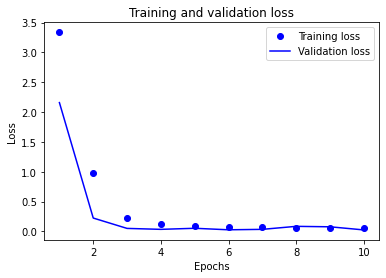

In [19]:
# plotting training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

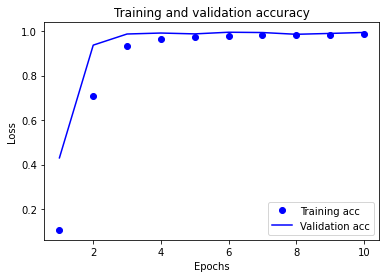

In [20]:
# Plotting training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
model.save("C:/Users/Francisco Duran/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model_25-06")


INFO:tensorflow:Assets written to: C:/Users/Francisco Duran/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model_25-06\assets


In [24]:
results = model.evaluate(x_test,y_test)

123/123 [==============================] - 5s 39ms/step - loss: 0.0293 - accuracy: 0.9929


In [40]:
x_t = x_train[0].reshape((48,48))
print(x_t[0].shape)
print(x_t[0])
list(x_t[0])
x_t = np.reshape(x_train[0], (48,48))
x_t*250

(48,)
[0.22352941 0.24705882 0.28235295 0.3137255  0.34509805 0.38039216
 0.42745098 0.47843137 0.5294118  0.5764706  0.61960787 0.61960787
 0.61960787 0.7372549  0.84705883 0.9529412  0.96862745 0.95686275
 0.9411765  0.87058824 0.7372549  0.63529414 0.5568628  0.5686275
 0.62352943 0.7137255  0.79607844 0.8745098  0.9372549  0.95686275
 0.93333334 0.8901961  0.83137256 0.74509805 0.627451   0.49019608
 0.44705883 0.42745098 0.43529412 0.41568628 0.37254903 0.34117648
 0.3137255  0.2901961  0.27450982 0.25882354 0.2627451  0.26666668]


array([[ 55.882355,  61.764706,  70.58824 , ...,  64.70589 ,  65.68628 ,
         66.66667 ],
       [ 64.70589 ,  68.62746 ,  75.4902  , ...,  69.60785 ,  70.58824 ,
         70.58824 ],
       [ 75.4902  ,  78.43137 ,  82.35294 , ...,  76.47059 ,  76.47059 ,
         76.47059 ],
       ...,
       [ 92.15687 ,  94.117645,  97.05882 , ..., 100.      ,  99.01961 ,
         99.01961 ],
       [ 89.21569 ,  90.19608 ,  92.15687 , ...,  98.039215,  96.07843 ,
         94.117645],
       [ 87.254906,  88.2353  ,  91.176476, ...,  96.07843 ,  92.15687 ,
         90.19608 ]], dtype=float32)

In [118]:
import random
# generate random integer values
from random import seed
from random import randint
test_number = 1
# seed random number generator
seed(randint(0,3923))

more_lsa_test_list_index = [878,73,114,893,1452,1844,1895,2021,3887]
n_incorrect= 0
for i in range(3923):
    test_number = i
    print("-----",test_number,"------")
    #print("-----",i,"------")
    x_t = np.reshape(x_test[test_number], (48,48))
    #print(str(np.argmax(np.array(y_test[test_number])))+" = "+str(y_test[test_number])+ " prediction: " + str(np.argmax(predictions[test_number])))
    #plt.imshow((x_t*255).astype("uint8"))
    
    #plt.title(str(np.argmax(np.array(y_test[test_number])))+" = "+str(y_test[test_number])+ " prediction: " + str(np.argmax(predictions[test_number])))
    #plt.axis("off")
    if(str(np.argmax(np.array(y_test[test_number]))) == str(np.argmax(predictions[test_number]))):
        print("----> Correct")
    else:
        print("----> Incorrect------------------------------")
        n_incorrect += 1


----- 0 ------
----> Correct
----- 1 ------
----> Correct
----- 2 ------
----> Correct
----- 3 ------
----> Correct
----- 4 ------
----> Correct
----- 5 ------
----> Correct
----- 6 ------
----> Correct
----- 7 ------
----> Correct
----- 8 ------
----> Correct
----- 9 ------
----> Correct
----- 10 ------
----> Correct
----- 11 ------
----> Correct
----- 12 ------
----> Correct
----- 13 ------
----> Correct
----- 14 ------
----> Correct
----- 15 ------
----> Correct
----- 16 ------
----> Correct
----- 17 ------
----> Correct
----- 18 ------
----> Correct
----- 19 ------
----> Correct
----- 20 ------
----> Correct
----- 21 ------
----> Correct
----- 22 ------
----> Correct
----- 23 ------
----> Correct
----- 24 ------
----> Correct
----- 25 ------
----> Correct
----- 26 ------
----> Correct
----- 27 ------
----> Correct
----- 28 ------
----> Correct
----- 29 ------
----> Correct
----- 30 ------
----> Correct
----- 31 ------
----> Correct
----- 32 ------
----> Correct
----- 33 ------
----

----> Correct
----- 801 ------
----> Correct
----- 802 ------
----> Correct
----- 803 ------
----> Correct
----- 804 ------
----> Correct
----- 805 ------
----> Correct
----- 806 ------
----> Correct
----- 807 ------
----> Correct
----- 808 ------
----> Correct
----- 809 ------
----> Correct
----- 810 ------
----> Correct
----- 811 ------
----> Correct
----- 812 ------
----> Correct
----- 813 ------
----> Correct
----- 814 ------
----> Correct
----- 815 ------
----> Correct
----- 816 ------
----> Correct
----- 817 ------
----> Correct
----- 818 ------
----> Correct
----- 819 ------
----> Correct
----- 820 ------
----> Correct
----- 821 ------
----> Correct
----- 822 ------
----> Correct
----- 823 ------
----> Correct
----- 824 ------
----> Correct
----- 825 ------
----> Correct
----- 826 ------
----> Correct
----- 827 ------
----> Correct
----- 828 ------
----> Correct
----- 829 ------
----> Correct
----- 830 ------
----> Correct
----- 831 ------
----> Correct
----- 832 ------
----> Co

----> Correct
----- 1446 ------
----> Correct
----- 1447 ------
----> Correct
----- 1448 ------
----> Correct
----- 1449 ------
----> Correct
----- 1450 ------
----> Correct
----- 1451 ------
----> Correct
----- 1452 ------
----> Correct
----- 1453 ------
----> Correct
----- 1454 ------
----> Correct
----- 1455 ------
----> Correct
----- 1456 ------
----> Correct
----- 1457 ------
----> Correct
----- 1458 ------
----> Correct
----- 1459 ------
----> Correct
----- 1460 ------
----> Correct
----- 1461 ------
----> Correct
----- 1462 ------
----> Correct
----- 1463 ------
----> Correct
----- 1464 ------
----> Incorrect------------------------------
----- 1465 ------
----> Correct
----- 1466 ------
----> Correct
----- 1467 ------
----> Correct
----- 1468 ------
----> Correct
----- 1469 ------
----> Correct
----- 1470 ------
----> Correct
----- 1471 ------
----> Correct
----- 1472 ------
----> Correct
----- 1473 ------
----> Correct
----- 1474 ------
----> Correct
----- 1475 ------
----> Co

----> Correct
----- 2123 ------
----> Correct
----- 2124 ------
----> Correct
----- 2125 ------
----> Correct
----- 2126 ------
----> Correct
----- 2127 ------
----> Correct
----- 2128 ------
----> Correct
----- 2129 ------
----> Correct
----- 2130 ------
----> Correct
----- 2131 ------
----> Correct
----- 2132 ------
----> Correct
----- 2133 ------
----> Correct
----- 2134 ------
----> Correct
----- 2135 ------
----> Correct
----- 2136 ------
----> Correct
----- 2137 ------
----> Correct
----- 2138 ------
----> Correct
----- 2139 ------
----> Correct
----- 2140 ------
----> Correct
----- 2141 ------
----> Correct
----- 2142 ------
----> Correct
----- 2143 ------
----> Correct
----- 2144 ------
----> Correct
----- 2145 ------
----> Correct
----- 2146 ------
----> Correct
----- 2147 ------
----> Correct
----- 2148 ------
----> Correct
----- 2149 ------
----> Correct
----- 2150 ------
----> Correct
----- 2151 ------
----> Correct
----- 2152 ------
----> Correct
----- 2153 ------
----> Co

----- 2747 ------
----> Correct
----- 2748 ------
----> Correct
----- 2749 ------
----> Correct
----- 2750 ------
----> Correct
----- 2751 ------
----> Correct
----- 2752 ------
----> Correct
----- 2753 ------
----> Correct
----- 2754 ------
----> Correct
----- 2755 ------
----> Correct
----- 2756 ------
----> Correct
----- 2757 ------
----> Correct
----- 2758 ------
----> Correct
----- 2759 ------
----> Correct
----- 2760 ------
----> Correct
----- 2761 ------
----> Correct
----- 2762 ------
----> Correct
----- 2763 ------
----> Correct
----- 2764 ------
----> Correct
----- 2765 ------
----> Correct
----- 2766 ------
----> Correct
----- 2767 ------
----> Correct
----- 2768 ------
----> Correct
----- 2769 ------
----> Correct
----- 2770 ------
----> Correct
----- 2771 ------
----> Correct
----- 2772 ------
----> Correct
----- 2773 ------
----> Correct
----- 2774 ------
----> Correct
----- 2775 ------
----> Correct
----- 2776 ------
----> Correct
----- 2777 ------
----> Correct
----- 27

----- 3372 ------
----> Correct
----- 3373 ------
----> Correct
----- 3374 ------
----> Correct
----- 3375 ------
----> Correct
----- 3376 ------
----> Correct
----- 3377 ------
----> Correct
----- 3378 ------
----> Correct
----- 3379 ------
----> Correct
----- 3380 ------
----> Correct
----- 3381 ------
----> Correct
----- 3382 ------
----> Correct
----- 3383 ------
----> Correct
----- 3384 ------
----> Correct
----- 3385 ------
----> Correct
----- 3386 ------
----> Correct
----- 3387 ------
----> Correct
----- 3388 ------
----> Correct
----- 3389 ------
----> Correct
----- 3390 ------
----> Correct
----- 3391 ------
----> Correct
----- 3392 ------
----> Correct
----- 3393 ------
----> Correct
----- 3394 ------
----> Correct
----- 3395 ------
----> Correct
----- 3396 ------
----> Correct
----- 3397 ------
----> Correct
----- 3398 ------
----> Correct
----- 3399 ------
----> Correct
----- 3400 ------
----> Correct
----- 3401 ------
----> Correct
----- 3402 ------
----> Correct
----- 34

In [119]:
n_incorrect

28

In [47]:
# Making predictions

predictions = model.predict(x_test)

(3923, 48, 48, 1)
(48, 48, 1)


In [48]:
print(len(predictions))

3923


In [53]:
predictions[114]

array([7.6079110e-14, 9.4715298e-16, 8.0172713e-19, 2.9832697e-14,
       6.4632551e-18, 1.2096591e-14, 4.4489965e-17, 2.3363220e-18,
       1.3874302e-12, 2.5028194e-18, 4.2966575e-20, 4.4948859e-13,
       1.7132063e-18, 1.7950354e-17, 5.1432669e-21, 1.5173123e-19,
       3.5612545e-19, 1.1415864e-24, 2.8483658e-11, 1.2114629e-17,
       1.9597572e-12, 2.4619326e-13, 3.2224521e-16, 1.0690389e-17,
       3.8472822e-10, 4.6923105e-15, 5.7647040e-13, 7.8071078e-15,
       1.0000000e+00, 1.5806209e-10, 1.3081411e-13, 1.8667056e-13,
       8.5082143e-17, 4.0902006e-19, 8.1496781e-19, 5.2972388e-17,
       6.1013193e-17, 1.8679116e-22, 4.1894335e-19, 5.1684075e-19,
       3.0792152e-17, 7.7282556e-16, 3.2974043e-20], dtype=float32)

28


## Surprise metrics

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0

In [65]:
!cd "C:/Users/Francisco Duran/Desktop/upc/project_notebooks/sadl"
from sa import fetch_dsa, fetch_lsa, get_sc
from utils import *

In [68]:
# Next steps
layer_names = ['dense_1']

args = argparse.Namespace(batch_size=128, d='mine',
                          dsa=False, is_classification=True,
                          lsa=True, n_bucket=1000, num_classes=43, 
                          save_path='./tmp/', target='test', upper_bound=2000, var_threshold=1e-05)


test_lsa = fetch_lsa(model, x_train, x_test, "test", layer_names, args)
#target_lsa = fetch_lsa(model, x_train, x_target, args.target, layer_names, args)
"""
target_cov = get_sc(
    np.amin(target_lsa), args.upper_bound, args.n_bucket, target_lsa
)"""

#auc = compute_roc_auc(test_lsa, target_lsa)
#print(infog("ROC-AUC: " + str(auc * 100)))

[train] Model serving
246/246 [==============================] - 42s 169ms/step
[train] Processing ATs
Layer: dense_1
train ATs is saved at ./tmp/mine_train_dense_1_ats.npy
[test] Model serving
31/31 [==============================] - 5s 158ms/step
[test] Processing ATs
Layer: dense_1
test ATs is saved at ./tmp/mine_test_dense_1_ats.npy


 11%|████████▏                                                                    | 417/3923 [00:00<00:00, 4139.77it/s]

The number of removed columns: 245
[test] Fetching LSA


100%|████████████████████████████████████████████████████████████████████████████| 3923/3923 [00:00<00:00, 5023.35it/s]


'\ntarget_cov = get_sc(\n    np.amin(target_lsa), args.upper_bound, args.n_bucket, target_lsa\n)'

In [72]:
print(len(test_lsa))
print(len(x_test))
test_lsa
more_lsa_index = np.argmax(test_lsa)
more_lsa_index

3923
3923


114

In [109]:
less_lsa_index = np.argmin(test_lsa)
less_lsa_index

878

In [106]:
# Verify I didn't confuse test with 
 #[x for x in fruits if x != "apple"] 
[(x, test_lsa.index(x))for x in test_lsa if x>100]

[(110.95153721276805, 73),
 (692.5674204082478, 114),
 (103.92706866193839, 893),
 (116.60411882421269, 1452),
 (162.23135852412136, 1844),
 (201.23544896111548, 1895),
 (193.1157180465849, 2021),
 (121.75919894069555, 3887)]

In [ ]:
[73,114,893,1452,1844,1895,2021,3887]